### Extraction of Posts and Comments from Reddit

In this project, we focus on extracting posts and comments from Reddit using web scraping techniques and interaction with the API. Reddit is a platform rich in user-generated content on various topics, making it a valuable resource for applications such as sentiment analysis, trend tracking, and topic modeling.

#### Objectives
- **Data Collection**: Retrieve posts and comments from specific subreddits based on thematic criteria (e.g., r/mentalhealth, r/fitness).
- **Data Processing**: Clean and preprocess the extracted data to prepare it for analysis.
- **Data Storage**: Store the collected data in a structured format, such as a CSV file or database, for later analysis.

#### Tools and Technologies
- **Python**: The primary programming language for web scraping and interacting with the API.
- **Requests**: A library for making HTTP requests, in case additional scraping is required.
- **Pandas**: A data manipulation library for handling and analyzing the extracted data.

#### Getting Started
1. **Set Up the Environment**: Install necessary libraries using pip (`praw`, `requests`, `pandas`).
2. **Obtain API Credentials**: Create a Reddit account and register an application to get API credentials (client ID, secret, and user agent).
3. **Define the Extraction Logic**: Write functions to extract data from specific subreddits or threads based on keywords or categories.
4. **Run the Scraper**: Launch the script and monitor the data collection process.
5. **Analyze the Data**: Use Pandas to analyze the collected posts and comments for insights.

#### Conclusion
This project provides a hands-on introduction to using Reddit's API and analyzing data with Python, while also allowing manipulation of data from a dynamic online community.


<p style="color:#FBCE60;text-align:center;font-size:30px"> Communities Rules Collection </p>

### Scraping Reddit's Health related Topics

In [1]:
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.chrome.options import Options
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from bs4 import BeautifulSoup
import pandas as pd
from datetime import datetime
import time
import json
# Function to save data periodically
def periodicSave(data, topic):
    data = pd.DataFrame(data)
    topic = topic[topic.find("/r/") + 1:]
    filename = f"./collected data/rulesData/redditRules{topic}.json"

    # Save as JSON (append-friendly)
    with open(filename, "a", encoding="utf-8") as f:
        json.dump(data.to_dict(orient="records"), f, ensure_ascii=False)
        f.write("\n")  # newline separated JSON objects

    print(f"Periodic save completed. Total rules saved: {len(data)}")



In [19]:
from urllib.request import Request, urlopen
from bs4 import BeautifulSoup
from datetime import datetime
import time
import re

base_url = "https://www.reddit.com"

def collectSubRedditsPosts(url):

    print(f"\n🔎 Scraping: {url}")

    try:
        # ✅ Set headers to mimic a browser
        headers = {
            "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) "
                        "AppleWebKit/537.36 (KHTML, like Gecko) "
                        "Chrome/120.0.0.0 Safari/537.36",
            "Accept": "text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,*/*;q=0.8",
            "Accept-Language": "en-US,en;q=0.9",
            "Connection": "keep-alive",
            "Referer": "https://example.com/"
        }

        req = Request(base_url+url, headers=headers)
        response = urlopen(req)
        html = response.read().decode("utf-8")

        soup = BeautifulSoup(html, "html.parser")
        rules = []

        for section in soup.find_all("faceplate-expandable-section-helper"):
            rule_obj = {}

         
            title_tag = section.find("h2")
            if title_tag:
                rule_obj["rule"] = title_tag.get_text(strip=True)

            sub_rules = []

            content_div = section.find(id=lambda x: x and x.startswith("rule-"))
            if content_div:
                # first description paragraph
                first_p = content_div.find("p")
                if first_p:
                    sub_rules.append(first_p.get_text(strip=True))

                # bullet points
                for li in content_div.find_all("li"):
                    p = li.find("p")
                    if p:
                        sub_rules.append(p.get_text(strip=True))

            rule_obj["sub_rules"] = sub_rules
            rules.append(rule_obj)
        return(rules)
    except Exception as e:
        print(f"❌ Error during scraping: {e}")
        


In [20]:
import pandas as pd 
topicsList=pd.read_csv("./collected data/healthRedditCommunities.csv")

In [21]:
import pandas as pd 
data=pd.read_json('./collected data/rulesData/allRedditRules.json')
processedCommunities=list(data["subreddit"].unique())
processedCommunities=["/r/"+topic+"/" for topic in processedCommunities]


In [ ]:
import pandas as pd
import time
from concurrent.futures import ThreadPoolExecutor, as_completed

collectedRules = []

def process_topic(index, topicLink, topicNameRaw):
    # Skip if topicName is missing
    if pd.isna(topicNameRaw):
        print(f"Skipping row {index} because topicName is NaN")
        return []
    if(topicLink in processedCommunities):
        print(f"Skipping topic  {topicLink} already processed")
        return []
    else :
        # Clean and lowercase topic name
        topicName = str(topicNameRaw).strip("/").lower()
        print(f"Collecting rules for: {topicName}")
        
        rules = collectSubRedditsPosts(topicLink)
        if rules:
            periodicSave(rules, topicName)
        # Sleep to be polite to servers
        time.sleep(3)
        return rules

# Use ThreadPoolExecutor to process multiple topics in parallel
with ThreadPoolExecutor(max_workers=2) as executor:
    # Submit all tasks
    futures = [
        executor.submit(process_topic, index, topicsList.loc[index, "topicLink"], topicsList.loc[index, "topicName"])
        for index in range(len(topicsList))
    ]
    
    # Collect results as they finish
    for future in as_completed(futures):
        result = future.result()
        if result:
            collectedRules.extend(result)



🔎 Scraping: /r/Health/

🔎 Scraping: /r/HealthyFood/
Periodic save completed. Total rules saved: 7
Periodic save completed. Total rules saved: 12

🔎 Scraping: /r/Coronavirus/

🔎 Scraping: /r/ADHD/
Periodic save completed. Total rules saved: 12
Periodic save completed. Total rules saved: 11
Skipping topic  /r/nursing/ already processed

🔎 Scraping: /r/COVID19/
Skipping topic  /r/medicine/ already processed
Skipping topic  /r/adhdwomen/ already processed
Skipping topic  /r/2healthbars/ already processed
Skipping topic  /r/thanksimcured/ already processed

🔎 Scraping: /r/PlasticSurgery/
Periodic save completed. Total rules saved: 12
Periodic save completed. Total rules saved: 12
Skipping topic  /r/pharmacy/ already processed

🔎 Scraping: /r/StudentNurse/

🔎 Scraping: /r/Anxietyhelp/
Periodic save completed. Total rules saved: 15
Periodic save completed. Total rules saved: 9
Skipping topic  /r/psychologystudents/ already processed

🔎 Scraping: /r/TalesFromThePharmacy/

🔎 Scraping: /r/Acade

In [2]:
import os
import json
import pandas as pd

def mergeAllRules(folder="./collected data/rulesData", output_file="./collected data/rulesData/allRedditRules.json"):
    """
    Merge all subreddit rules JSON files into one file, adding 'subreddit' field,
    and delete the original files.
    """
    all_rules = []

    files_to_delete = []

    # Loop over all JSON files
    for filename in os.listdir(folder):
        if filename.endswith(".json"):
            filepath = os.path.join(folder, filename)
            # Extract subreddit name from filename
            subreddit = filename.replace("redditRules", "").replace(".json", "").replace("r_", "")
            
            with open(filepath, "r", encoding="utf-8") as f:
                for line in f:
                    try:
                        rules_list = json.loads(line)
                        for rule in rules_list:
                            rule["subreddit"] = subreddit
                            all_rules.append(rule)
                    except json.JSONDecodeError:
                        print(f"⚠️ Skipping malformed line in {filename}")
            
            files_to_delete.append(filepath)

    # Remove duplicates (optional, based on rule text)
    unique_rules = { (rule['rule'], rule['subreddit']): rule for rule in all_rules }
    all_rules = list(unique_rules.values())

    # Save all rules into one JSON file
    os.makedirs(os.path.dirname(output_file), exist_ok=True)
    with open(output_file, "w", encoding="utf-8") as f:
        json.dump(all_rules, f, ensure_ascii=False, indent=2)

    # Delete original files
    for filepath in files_to_delete:
        os.remove(filepath)

    print(f"✅ Merged {len(all_rules)} rules into '{output_file}' and deleted {len(files_to_delete)} original files.")

# Example usage:
mergeAllRules()


✅ Merged 797 rules into './collected data/rulesData/allRedditRules.json' and deleted 119 original files.


### Analysis 


In [11]:
import pandas as pd 
data=pd.read_json('./collected data/rulesData/allRedditRules.json')

#### Data visualisation

In [ ]:
# 1. Number of rules per community
rules_per_community = data.groupby("subreddit")["rule"].nunique()
print("Number of rules per community:\n", rules_per_community)

# 2. Number of subrules per community
# Count the number of subrules in each row, then sum by community
data["num_subrules"] = data["sub_rules"].apply(len)
subrules_per_community = data.groupby("subreddit")["num_subrules"].sum()
print("\nNumber of subrules per community:\n", subrules_per_community)

# 3. Number of subrules per rule
subrules_per_rule = data.set_index("rule")["sub_rules"].apply(len)
print("\nNumber of subrules per rule:\n", subrules_per_rule)


C:\Users\INFOKOM\AppData\Local\Temp\ipykernel_22352\2838973303.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=top_rules_per_community.index, x=top_rules_per_community.values, palette="Blues_d")


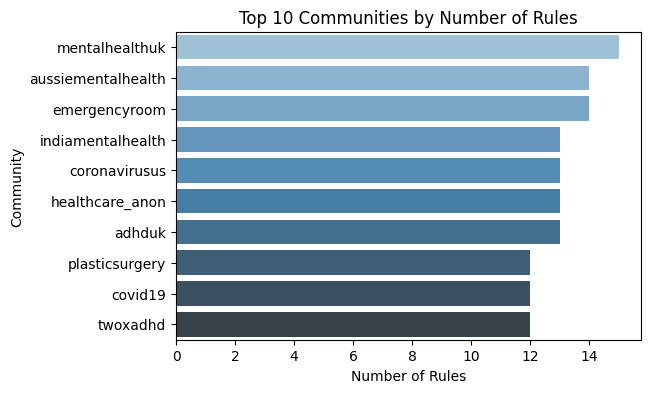

C:\Users\INFOKOM\AppData\Local\Temp\ipykernel_22352\2838973303.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=top_subrules_per_community.index, x=top_subrules_per_community.values, palette="Greens_d")


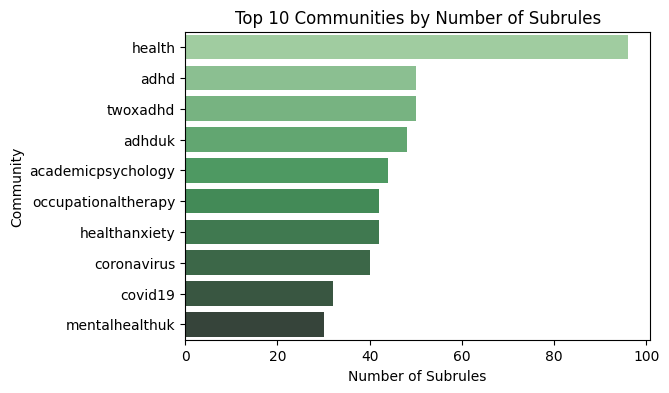

C:\Users\INFOKOM\AppData\Local\Temp\ipykernel_22352\2838973303.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=top_subrules_per_rule.index, x=top_subrules_per_rule.values, palette="Oranges_d")


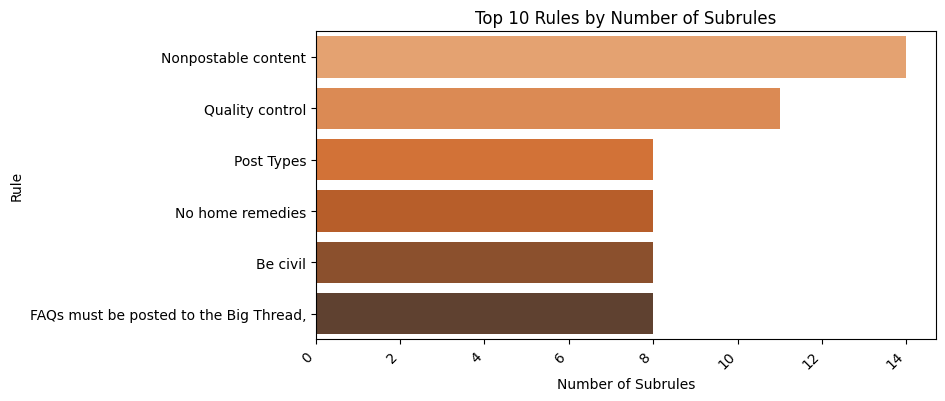

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

# --- Top 10 rules per community ---
top_rules_per_community = rules_per_community.sort_values(ascending=False).head(10)
plt.figure(figsize=(6,4))
sns.barplot(y=top_rules_per_community.index, x=top_rules_per_community.values, palette="Blues_d")
plt.title("Top 10 Communities by Number of Rules")
plt.xlabel("Number of Rules")
plt.ylabel("Community")
plt.show()

# --- Top 10 subrules per community ---
top_subrules_per_community = subrules_per_community.sort_values(ascending=False).head(10)
plt.figure(figsize=(6,4))
sns.barplot(y=top_subrules_per_community.index, x=top_subrules_per_community.values, palette="Greens_d")
plt.title("Top 10 Communities by Number of Subrules")
plt.xlabel("Number of Subrules")
plt.ylabel("Community")
plt.show()

# --- Top 10 rules by number of subrules ---
top_subrules_per_rule = subrules_per_rule.sort_values(ascending=False).head(10)
plt.figure(figsize=(8,4))
sns.barplot(y=top_subrules_per_rule.index, x=top_subrules_per_rule.values, palette="Oranges_d")
plt.title("Top 10 Rules by Number of Subrules")
plt.xlabel("Number of Subrules")
plt.ylabel("Rule")
plt.xticks(rotation=45, ha="right")
plt.show()


### code book creation 

In [73]:
import json
import pandas as pd
import numpy as np
import re
from collections import Counter, defaultdict
import matplotlib.pyplot as plt
import seaborn as sns
from typing import Dict, List, Tuple, Set, Any
import csv

class RedditRulesAnalyzer:
    def __init__(self, json_file_path: str):
        """Initialize the analyzer with JSON data"""
        with open(json_file_path, 'r', encoding='utf-8') as f:
            self.data = json.load(f)
        
        # Clean duplicates
        self.dedup_data()
        
        # Initialize codebook
        self.codebook = {
            'Legitimacy': {},
            'Literacy': {},
            'Infrastructure': {},
            'Equity': {}
        }
        
        # Initialize results
        self.results = {
            'community_profiles': {},
            'coded_rules': [],
            'spectrum_positions': {}
        }
    
    def dedup_data(self):
        """Remove duplicate rules from the data"""
        seen = set()
        unique_data = []
        
        for rule in self.data:
            # Create a unique identifier
            rule_id = f"{rule['subreddit']}_{rule['rule']}"
            if rule_id not in seen:
                seen.add(rule_id)
                unique_data.append(rule)
        
        self.data = unique_data
        print(f"Removed duplicates. Original: {len(self.data)} rules, Deduped: {len(unique_data)} rules")
    def analyze_infrastructure_tools(self, results: Dict) -> Dict:
        """
        Analyze infrastructural tools for knowledge organization (RQ2)
        Based on coded rules and community profiles from the main analysis
        """
        # Extract needed data from results
        community_profiles = results['community_profiles']
        coded_rules = results['coded_rules']
        codebook = results['codebook']
        
        print("\n" + "=" * 60)
        print("ANALYSIS OF INFRASTRUCTURAL TOOLS FOR KNOWLEDGE ORGANIZATION (RQ2)")
        print("=" * 60)
        
        # Get all infrastructure codes from codebook
        infrastructure_codes = list(codebook['Infrastructure'].keys())
        print(f"\nFound {len(infrastructure_codes)} infrastructure codes:")
        for code in infrastructure_codes:
            print(f"  - {code}: {codebook['Infrastructure'][code]['definition']}")
        
        # 1. Prevalence of each infrastructure tool across communities
        print("\n1. PREVALENCE OF INFRASTRUCTURAL TOOLS ACROSS COMMUNITIES")
        print("-" * 60)
        
        tool_prevalence = {}
        for code in infrastructure_codes:
            count = 0
            for community, profile in community_profiles.items():
                if profile['Infrastructure'].get(code, 0) > 0:
                    count += 1
            
            percentage = (count / len(community_profiles)) * 100
            tool_prevalence[code] = {
                'count': count,
                'percentage': percentage
            }
            print(f"{code}: {count}/{len(community_profiles)} communities ({percentage:.1f}%)")
        
        # 2. Co-occurrence analysis: Which tools are used together
        print("\n2. CO-OCCURRENCE OF INFRASTRUCTURAL TOOLS")
        print("-" * 60)
        
        # Create tool presence matrix
        communities = list(community_profiles.keys())
        presence_matrix = pd.DataFrame(
            np.zeros((len(communities), len(infrastructure_codes))),
            index=communities,
            columns=infrastructure_codes
        )
        
        for i, community in enumerate(communities):
            for j, code in enumerate(infrastructure_codes):
                if community_profiles[community]['Infrastructure'].get(code, 0) > 0:
                    presence_matrix.iloc[i, j] = 1
        
        # Calculate co-occurrence matrix
        co_occurrence = presence_matrix.T.dot(presence_matrix)
        
        # Normalize by tool prevalence
        normalized_co_occurrence = co_occurrence.copy()
        for i in range(len(infrastructure_codes)):
            for j in range(len(infrastructure_codes)):
                if i != j:
                    normalized_co_occurrence.iloc[i, j] = (
                        co_occurrence.iloc[i, j] / 
                        min(co_occurrence.iloc[i, i], co_occurrence.iloc[j, j])
                    )
        
        print("\nStrongest tool pairings (co-occurrence > 50%):")
        strong_pairs = []
        for i in range(len(infrastructure_codes)):
            for j in range(i+1, len(infrastructure_codes)):
                if normalized_co_occurrence.iloc[i, j] > 0.5:
                    tool1 = infrastructure_codes[i]
                    tool2 = infrastructure_codes[j]
                    co_occur = normalized_co_occurrence.iloc[i, j] * 100
                    strong_pairs.append((tool1, tool2, co_occur))
        
        # Sort by co-occurrence strength
        strong_pairs.sort(key=lambda x: x[2], reverse=True)
        for tool1, tool2, co_occur in strong_pairs[:10]:  # Top 10 pairs
            print(f"  - {tool1} & {tool2}: {co_occur:.1f}% co-occurrence")
        
        # 3. Tool clusters: Identify common infrastructure "packages"
        print("\n3. INFRASTRUCTURE TOOL CLUSTERS")
        print("-" * 60)
        
        # Use hierarchical clustering to identify tool clusters
        from scipy.cluster.hierarchy import linkage, fcluster
        from scipy.spatial.distance import pdist
        
        # Calculate distance matrix (Jaccard distance for binary data)
        distance_matrix = pdist(presence_matrix.T.values, metric='jaccard')
        
        # Perform hierarchical clustering
        Z = linkage(distance_matrix, method='ward')
        clusters = fcluster(Z, t=3, criterion='maxclust')
        
        # Group tools by cluster
        tool_clusters = {}
        for tool, cluster_id in zip(infrastructure_codes, clusters):
            if cluster_id not in tool_clusters:
                tool_clusters[cluster_id] = []
            tool_clusters[cluster_id].append(tool)
        
        print("Identified infrastructure tool clusters:")
        for cluster_id, tools in tool_clusters.items():
            print(f"\nCluster {cluster_id} ({len(tools)} tools):")
            for tool in tools:
                print(f"  - {tool}")
        
        # 4. Relationship with spectrum position
        print("\n4. RELATIONSHIP WITH KO-EQUITY SPECTRUM")
        print("-" * 60)
        
        spectrum_positions = results['spectrum_positions']
        
        # Calculate average spectrum position for communities with/without each tool
        tool_spectrum_analysis = {}
        for code in infrastructure_codes:
            with_tool_positions = []
            without_tool_positions = []
            
            for community in communities:
                position = spectrum_positions[community]['position']
                if presence_matrix.loc[community, code] == 1:
                    with_tool_positions.append(position)
                else:
                    without_tool_positions.append(position)
            
            if with_tool_positions and without_tool_positions:
                avg_with = np.mean(with_tool_positions)
                avg_without = np.mean(without_tool_positions)
                diff = avg_with - avg_without
                
                tool_spectrum_analysis[code] = {
                    'avg_position_with': avg_with,
                    'avg_position_without': avg_without,
                    'difference': diff,
                    'tends_toward': 'Curation' if diff > 0 else 'Censorship'
                }
        
        print("\nInfrastructure tools and their association with spectrum position:")
        print("(Positive difference = more curation-oriented, Negative = more censorship-oriented)")
        
        sorted_tools = sorted(tool_spectrum_analysis.items(), 
                            key=lambda x: abs(x[1]['difference']), 
                            reverse=True)
        
        for tool, analysis in sorted_tools[:10]:  # Top 10 most differentiating
            diff = analysis['difference']
            direction = analysis['tends_toward']
            print(f"  - {tool}: Δ = {diff:.3f} (tends toward {direction})")
        
        # 5. Examples of infrastructure rules
        print("\n5. REPRESENTATIVE RULE EXAMPLES FOR EACH INFRASTRUCTURE TOOL")
        print("-" * 60)
        
        tool_examples = defaultdict(list)
        for rule in coded_rules:
            codes = rule['codes']['Infrastructure']
            if codes:
                for code in codes:
                    if len(tool_examples[code]) < 3:  # Keep up to 3 examples per code
                        tool_examples[code].append(rule['full_text'][:150] + "...")
        
        for code in infrastructure_codes:
            if tool_examples[code]:
                print(f"\n{code}:")
                for i, example in enumerate(tool_examples[code], 1):
                    print(f"  {i}. {example}")
        
        # 6. Statistical summary
        print("\n6. STATISTICAL SUMMARY OF INFRASTRUCTURE ANALYSIS")
        print("-" * 60)
        
        # Calculate descriptive statistics
        total_communities = len(community_profiles)
        tools_per_community = []
        for community in communities:
            tools_count = sum(1 for code in infrastructure_codes 
                            if presence_matrix.loc[community, code] == 1)
            tools_per_community.append(tools_count)
        
        print(f"Total communities analyzed: {total_communities}")
        print(f"Average infrastructure tools per community: {np.mean(tools_per_community):.2f}")
        print(f"Standard deviation: {np.std(tools_per_community):.2f}")
        print(f"Range: {min(tools_per_community)} - {max(tools_per_community)} tools")
        
        # Most common tool combinations
        from itertools import combinations
        
        print("\nMost common tool combinations (pairs):")
        top_pairs = []
        for i, tool1 in enumerate(infrastructure_codes):
            for j, tool2 in enumerate(infrastructure_codes[i+1:], i+1):
                co_occur = co_occurrence.iloc[i, j]
                if co_occur > 10:  # At least 10 communities
                    top_pairs.append((tool1, tool2, int(co_occur)))
        
        top_pairs.sort(key=lambda x: x[2], reverse=True)
        for tool1, tool2, count in top_pairs[:5]:
            print(f"  - {tool1} + {tool2}: {count} communities ({count/total_communities*100:.1f}%)")
        
        # Return comprehensive analysis
        infrastructure_analysis = {
            'tool_prevalence': tool_prevalence,
            'presence_matrix': presence_matrix,
            'co_occurrence_matrix': co_occurrence,
            'tool_clusters': tool_clusters,
            'spectrum_relationships': tool_spectrum_analysis,
            'examples': dict(tool_examples),
            'statistics': {
                'total_communities': total_communities,
                'avg_tools_per_community': np.mean(tools_per_community),
                'std_tools_per_community': np.std(tools_per_community),
                'tools_per_community_distribution': tools_per_community
            }
        }
        
        return infrastructure_analysis


    def export_infrastructure_analysis(self, infrastructure_analysis: Dict, output_dir: str = 'results'):
        """Export infrastructure analysis results to files"""
        
        import os
        os.makedirs(output_dir, exist_ok=True)
        
        # 1. Tool prevalence
        prevalence_df = pd.DataFrame([
            {
                'infrastructure_tool': tool,
                'communities_with_tool': data['count'],
                'percentage': data['percentage']
            }
            for tool, data in infrastructure_analysis['tool_prevalence'].items()
        ])
        prevalence_df = prevalence_df.sort_values('percentage', ascending=False)
        prevalence_df.to_csv(f'{output_dir}/infrastructure_prevalence.csv', index=False)
        
        # 2. Co-occurrence matrix
        infrastructure_analysis['co_occurrence_matrix'].to_csv(
            f'{output_dir}/infrastructure_co_occurrence.csv'
        )
        
        # 3. Tool clusters
        clusters_data = []
        for cluster_id, tools in infrastructure_analysis['tool_clusters'].items():
            for tool in tools:
                clusters_data.append({
                    'cluster_id': cluster_id,
                    'infrastructure_tool': tool,
                    'cluster_size': len(tools)
                })
        pd.DataFrame(clusters_data).to_csv(
            f'{output_dir}/infrastructure_clusters.csv', index=False
        )
        
        # 4. Spectrum relationships
        spectrum_df = pd.DataFrame([
            {
                'infrastructure_tool': tool,
                'avg_position_with_tool': data['avg_position_with'],
                'avg_position_without_tool': data['avg_position_without'],
                'difference': data['difference'],
                'tends_toward': data['tends_toward']
            }
            for tool, data in infrastructure_analysis['spectrum_relationships'].items()
        ])
        spectrum_df = spectrum_df.sort_values('difference', ascending=False)
        spectrum_df.to_csv(f'{output_dir}/infrastructure_spectrum_relationship.csv', index=False)
        
        # 5. Examples
        examples_data = []
        for tool, examples in infrastructure_analysis['examples'].items():
            for i, example in enumerate(examples):
                examples_data.append({
                    'infrastructure_tool': tool,
                    'example_number': i + 1,
                    'rule_excerpt': example
                })
        pd.DataFrame(examples_data).to_csv(
            f'{output_dir}/infrastructure_rule_examples.csv', index=False
        )
        
        # 6. Statistics
        stats_df = pd.DataFrame([infrastructure_analysis['statistics']])
        stats_df.to_csv(f'{output_dir}/infrastructure_statistics.csv', index=False)
        
        print(f"\nInfrastructure analysis exported to '{output_dir}' directory")

    def extract_rule_statements(self) -> List[Dict]:
        """Extract discrete rule statements (unit of analysis)"""
        rule_statements = []
        
        for rule_entry in self.data:
            main_rule = rule_entry['rule']
            subreddit = rule_entry['subreddit']
            sub_rules = rule_entry['sub_rules']
            
            # Main rule as a statement
            rule_statements.append({
                'subreddit': subreddit,
                'rule_type': 'main',
                'text': main_rule,
                'full_text': f"{main_rule} {' '.join(sub_rules)}" if sub_rules else main_rule
            })
            
            # Each sub-rule as a statement
            for i, sub_rule in enumerate(sub_rules):
                rule_statements.append({
                    'subreddit': subreddit,
                    'rule_type': 'sub',
                    'text': sub_rule,
                    'full_text': f"{main_rule}: {sub_rule}"
                })
        
        print(f"Extracted {len(rule_statements)} rule statements")
        return rule_statements
    
    def initial_deductive_coding(self, rule_statements: List[Dict]) -> List[Dict]:
        """Apply initial deductive coding based on conceptual framework"""
        
        # Deductive coding patterns
        legitimacy_keywords = [
            'medical advice', 'diagnos', 'treatment', 'evidence', 'source',
            'professional', 'peer-review', 'scientific', 'misinformation',
            'fact', 'accurate', 'truth', 'verify', 'credible'
        ]
        
        literacy_keywords = [
            'be kind', 'be respectful', 'civil', 'constructive',
            'supportive', 'helpful', 'experience', 'personal',
            'share', 'discuss', 'question', 'ask', 'learn'
        ]
        
        infrastructure_keywords = [
            'flair', 'tag', 'megathread', 'wiki', 'format',
            'template', 'structured', 'organization', 'system',
            'automod', 'bot', 'modmail', 'approval', 'process'
        ]
        
        equity_keywords = [
            'inclusive', 'exclusive', 'gatekeep', 'welcome',
            'safe space', 'diversity', 'accessibility', 'new user',
            'beginner', 'transparent', 'fair', 'equal', 'opportunity'
        ]
        
        coded_rules = []
        
        for rule in rule_statements:
            text_lower = rule['full_text'].lower()
            
            # Initialize codes
            codes = {
                'Legitimacy': [],
                'Literacy': [],
                'Infrastructure': [],
                'Equity': []
            }
            
            # Deductive coding
            for keyword in legitimacy_keywords:
                if keyword in text_lower:
                    if 'medical' in keyword or 'diagnos' in keyword:
                        codes['Legitimacy'].append('medical_advice_prohibition')
                    elif 'evidence' in keyword or 'source' in keyword:
                        codes['Legitimacy'].append('source_requirements')
                    elif 'misinformation' in keyword:
                        codes['Legitimacy'].append('misinformation_definition')
                    else:
                        codes['Legitimacy'].append('knowledge_criteria')
            
            for keyword in literacy_keywords:
                if keyword in text_lower:
                    if 'be kind' in keyword or 'respectful' in keyword:
                        codes['Literacy'].append('civil_discourse')
                    elif 'supportive' in keyword or 'helpful' in keyword:
                        codes['Literacy'].append('supportive_environment')
                    elif 'experience' in keyword or 'personal' in keyword:
                        codes['Literacy'].append('anecdote_allowance')
            
            for keyword in infrastructure_keywords:
                if keyword in text_lower:
                    if 'flair' in keyword or 'tag' in keyword:
                        codes['Infrastructure'].append('flair_system')
                    elif 'megathread' in keyword:
                        codes['Infrastructure'].append('megathread_use')
                    elif 'wiki' in keyword:
                        codes['Infrastructure'].append('wiki_reference')
                    elif 'format' in keyword or 'structured' in keyword:
                        codes['Infrastructure'].append('structured_format')
            
            for keyword in equity_keywords:
                if keyword in text_lower:
                    if 'inclusive' in keyword or 'welcome' in keyword:
                        codes['Equity'].append('inclusion_mechanisms')
                    elif 'gatekeep' in keyword or 'exclusive' in keyword:
                        codes['Equity'].append('gatekeeping_rules')
                    elif 'safe space' in keyword:
                        codes['Equity'].append('safe_space_creation')
                    elif 'new user' in keyword or 'beginner' in keyword:
                        codes['Equity'].append('new_user_accommodation')
            
            # Add to coded rules
            coded_rule = rule.copy()
            coded_rule['codes'] = codes
            coded_rule['has_codes'] = any(len(codes[cat]) > 0 for cat in codes)
            coded_rules.append(coded_rule)
        
        print(f"Applied deductive coding to {len(coded_rules)} rule statements")
        return coded_rules
    
    def inductive_coding_cycle(self, coded_rules: List[Dict], num_cycles: int = 3) -> Tuple[List[Dict], Dict]:
        """Perform iterative inductive coding cycles"""
        
        # Store emergent codes from each cycle
        emergent_codes_history = []
        
        for cycle in range(num_cycles):
            print(f"\n=== Inductive Coding Cycle {cycle + 1} ===")
            
            # Collect potential new codes
            potential_codes = defaultdict(list)
            
            for rule in coded_rules:
                text = rule['full_text'].lower()
                
                # Pattern recognition for emergent themes
                # Medical/Health specific patterns
                if 'no medical' in text or 'not a doctor' in text or 'not medical advice' in text:
                    potential_codes['Legitimacy'].append('professional_boundary')
                
                if 'survey' in text or 'research' in text or 'study' in text:
                    if 'approval' in text or 'mod' in text or 'permission' in text:
                        potential_codes['Legitimacy'].append('research_gatekeeping')
                
                # Literacy patterns
                if 'vent' in text or 'rant' in text or 'share' in text:
                    if 'flair' in text or 'tag' in text or 'megathread' in text:
                        potential_codes['Literacy'].append('emotional_expression_channeling')
                
                if 'trigger' in text or 'sensitive' in text or 'cw' in text or 'tw' in text:
                    potential_codes['Literacy'].append('trauma_sensitivity')
                
                # Infrastructure patterns
                if 'auto' in text or 'bot' in text or 'automod' in text:
                    potential_codes['Infrastructure'].append('automation_tools')
                
                if 'search' in text or 'faq' in text or 'wiki' in text:
                    if 'before posting' in text or 'check' in text:
                        potential_codes['Infrastructure'].append('knowledge_base_integration')
                
                # Equity patterns
                if 'self-promot' in text or 'advert' in text or 'spam' in text:
                    potential_codes['Equity'].append('commercial_restriction')
                
                if 'crisis' in text or 'suicide' in text or 'self-harm' in text:
                    if 'not' in text or 'cannot help' in text:
                        potential_codes['Equity'].append('crisis_limitation')
            
            # Analyze and select significant new codes (appearing in > 5% of rules)
            new_codes = {}
            total_rules = len(coded_rules)
            
            for category, codes in potential_codes.items():
                code_counts = Counter(codes)
                for code, count in code_counts.items():
                    if count / total_rules > 0.05:  # 5% threshold
                        if code not in new_codes:
                            new_codes[code] = category
                        # Apply to relevant rules
                        for rule in coded_rules:
                            if code in str(rule['codes']).lower():
                                rule['codes'][category].append(code)
            
            emergent_codes_history.append(new_codes)
            print(f"Cycle {cycle + 1}: Found {len(new_codes)} new significant codes")
        
        # Update codebook with emergent codes
        for history in emergent_codes_history:
            for code, category in history.items():
                if code not in self.codebook[category]:
                    self.codebook[category][code] = {
                        'definition': self.generate_code_definition(code),
                        'examples': []
                    }
        
        return coded_rules, self.codebook
    
    def generate_code_definition(self, code: str) -> str:
        """Generate a definition for a code based on its name"""
        definitions = {
            'professional_boundary': 'Rules that explicitly state community is not a substitute for professional medical advice',
            'research_gatekeeping': 'Rules requiring moderator approval for research/surveys',
            'emotional_expression_channeling': 'Rules that direct emotional content to specific channels',
            'trauma_sensitivity': 'Rules requiring content warnings for sensitive topics',
            'automation_tools': 'Rules mentioning automated moderation tools',
            'knowledge_base_integration': 'Rules that reference FAQs, wikis, or search before posting',
            'commercial_restriction': 'Rules prohibiting self-promotion and advertising',
            'crisis_limitation': 'Rules stating limitations in handling crisis situations'
        }
        return definitions.get(code, f"Rules related to {code.replace('_', ' ')}")
    
    def create_community_profiles(self, coded_rules: List[Dict]) -> Dict:
        """Create governance profiles for each community"""
        community_profiles = defaultdict(lambda: {
            'Legitimacy': Counter(),
            'Literacy': Counter(),
            'Infrastructure': Counter(),
            'Equity': Counter(),
            'total_rules': 0,
            'rule_texts': []
        })
        
        for rule in coded_rules:
            subreddit = rule['subreddit']
            profile = community_profiles[subreddit]
            profile['total_rules'] += 1
            profile['rule_texts'].append(rule['full_text'])
            
            # Aggregate codes
            for category, codes in rule['codes'].items():
                for code in codes:
                    profile[category][code] += 1
        
        print(f"Created profiles for {len(community_profiles)} communities")
        return dict(community_profiles)
    
    def map_to_spectrum(self, community_profiles: Dict) -> Dict:
        """Map each community to the KO-Equity Spectrum"""
        
        spectrum_positions = {}
        
        for community, profile in community_profiles.items():
            # Calculate scores for each pole
            
            # Censorship indicators
            censorship_score = 0
            censorship_indicators = [
                'medical_advice_prohibition',
                'research_gatekeeping',
                'commercial_restriction',
                'crisis_limitation',
                'professional_boundary'
            ]
            
            for indicator in censorship_indicators:
                for category in ['Legitimacy', 'Equity']:
                    censorship_score += profile[category].get(indicator, 0)
            
            # Curation indicators
            curation_score = 0
            curation_indicators = [
                'flair_system',
                'megathread_use',
                'structured_format',
                'knowledge_base_integration',
                'emotional_expression_channeling',
                'trauma_sensitivity'
            ]
            
            for indicator in curation_indicators:
                for category in ['Infrastructure', 'Literacy']:
                    curation_score += profile[category].get(indicator, 0)
            
            # Calculate position on spectrum (0 = Censorship, 1 = Curation)
            total_score = censorship_score + curation_score
            if total_score > 0:
                position = curation_score / total_score
            else:
                position = 0.5  # Neutral
            
            # Determine pole
            if position < 0.4:
                pole = "Pre-emptive Censorship"
            elif position > 0.6:
                pole = "Participatory Curation"
            else:
                pole = "Moderate/Neutral"
            
            spectrum_positions[community] = {
                'position': position,
                'pole': pole,
                'censorship_score': censorship_score,
                'curation_score': curation_score,
                'total_codes': total_score
            }
        
        return spectrum_positions
    
    def analyze_by_disease_context(self, community_profiles: Dict, spectrum_positions: Dict) -> Dict:
        """Analyze patterns across different disease contexts (RQ3)"""
        
        # Classify communities by disease context
        disease_categories = {
            'mental_health': ['adhd', 'anxiety', 'depression', 'mentalhealth', 'therapy'],
            'chronic_illness': ['cancer', 'diabetes', 'addisons', 'longcovid', 'chronic'],
            'infectious_disease': ['covid', 'coronavirus', 'herpes', 'vaccine'],
            'surgical': ['surgery', 'plasticsurgery', 'bariatric'],
            'general_health': ['health', 'askadoctor', 'medical', 'healthquestions']
        }
        
        category_results = {}
        
        for category, keywords in disease_categories.items():
            relevant_communities = []
            for community in community_profiles.keys():
                if any(keyword in community.lower() for keyword in keywords):
                    relevant_communities.append(community)
            
            if relevant_communities:
                positions = [spectrum_positions[comm]['position'] for comm in relevant_communities]
                category_results[category] = {
                    'count': len(relevant_communities),
                    'mean_position': np.mean(positions),
                    'std_position': np.std(positions),
                    'communities': relevant_communities,
                    'censorship_avg': np.mean([spectrum_positions[comm]['censorship_score'] for comm in relevant_communities]),
                    'curation_avg': np.mean([spectrum_positions[comm]['curation_score'] for comm in relevant_communities])
                }
        
        return category_results
    
    def identify_governance_clusters(self, community_profiles: Dict, spectrum_positions: Dict) -> Dict:
        """Identify overarching governance models (RQ4)"""
        
        # Extract features for clustering
        features = []
        communities_list = []
        
        for community, profile in community_profiles.items():
            features.append([
                profile['Legitimacy'].get('medical_advice_prohibition', 0),
                profile['Legitimacy'].get('source_requirements', 0),
                profile['Literacy'].get('civil_discourse', 0),
                profile['Literacy'].get('supportive_environment', 0),
                profile['Infrastructure'].get('flair_system', 0),
                profile['Infrastructure'].get('megathread_use', 0),
                profile['Equity'].get('inclusion_mechanisms', 0),
                profile['Equity'].get('gatekeeping_rules', 0),
                spectrum_positions[community]['position']
            ])
            communities_list.append(community)
        
        # Simple heuristic clustering based on governance patterns
        clusters = {}
        
        for i, community in enumerate(communities_list):
            profile = community_profiles[community]
            position = spectrum_positions[community]
            
            # Define cluster criteria
            if position['position'] < 0.3:
                cluster = 'Strict Moderation'
            elif position['position'] > 0.7:
                cluster = 'Structured Community'
            elif profile['Literacy'].get('civil_discourse', 0) > 2:
                cluster = 'Support-Focused'
            elif profile['Infrastructure'].get('flair_system', 0) > 1:
                cluster = 'Organized Discussion'
            else:
                cluster = 'Balanced Approach'
            
            clusters[community] = {
                'cluster': cluster,
                'features': features[i],
                'position': position
            }
        
        # Aggregate cluster statistics
        cluster_stats = {}
        for community, data in clusters.items():
            cluster_name = data['cluster']
            if cluster_name not in cluster_stats:
                cluster_stats[cluster_name] = {
                    'count': 0,
                    'communities': [],
                    'avg_position': 0,
                    'positions': []
                }
            
            cluster_stats[cluster_name]['count'] += 1
            cluster_stats[cluster_name]['communities'].append(community)
            cluster_stats[cluster_name]['positions'].append(data['position']['position'])
        
        for cluster in cluster_stats:
            positions = cluster_stats[cluster]['positions']
            cluster_stats[cluster]['avg_position'] = np.mean(positions)
            cluster_stats[cluster]['std_position'] = np.std(positions)
        
        return {
            'individual_clusters': clusters,
            'aggregate_stats': cluster_stats
        }
    
    def export_results(self, coded_rules: List[Dict], community_profiles: Dict, 
                      spectrum_positions: Dict, disease_analysis: Dict, 
                      governance_clusters: Dict, output_dir: str = 'results'):
        """Export all analysis results to files"""
        
        import os
        os.makedirs(output_dir, exist_ok=True)
        
        # 1. Export coded rules
        coded_rules_df = pd.DataFrame([
            {
                'subreddit': r['subreddit'],
                'rule_type': r['rule_type'],
                'text': r['text'][:200],  # Truncate for CSV
                'full_text': r['full_text'][:500],
                'legitimacy_codes': ', '.join(r['codes']['Legitimacy']),
                'literacy_codes': ', '.join(r['codes']['Literacy']),
                'infrastructure_codes': ', '.join(r['codes']['Infrastructure']),
                'equity_codes': ', '.join(r['codes']['Equity']),
                'has_codes': r['has_codes']
            }
            for r in coded_rules
        ])
        coded_rules_df.to_csv(f'{output_dir}/coded_rules.csv', index=False, encoding='utf-8')
        
        # 2. Export community profiles
        profiles_data = []
        for community, profile in community_profiles.items():
            profiles_data.append({
                'subreddit': community,
                'total_rules': profile['total_rules'],
                'legitimacy_codes_count': sum(profile['Legitimacy'].values()),
                'literacy_codes_count': sum(profile['Literacy'].values()),
                'infrastructure_codes_count': sum(profile['Infrastructure'].values()),
                'equity_codes_count': sum(profile['Equity'].values()),
                'top_legitimacy_code': max(profile['Legitimacy'].items(), key=lambda x: x[1], default=('None', 0))[0],
                'top_literacy_code': max(profile['Literacy'].items(), key=lambda x: x[1], default=('None', 0))[0],
                'top_infrastructure_code': max(profile['Infrastructure'].items(), key=lambda x: x[1], default=('None', 0))[0],
                'top_equity_code': max(profile['Equity'].items(), key=lambda x: x[1], default=('None', 0))[0]
            })
        pd.DataFrame(profiles_data).to_csv(f'{output_dir}/community_profiles.csv', index=False)
        
        # 3. Export spectrum positions
        spectrum_df = pd.DataFrame([
            {
                'subreddit': comm,
                'position': data['position'],
                'pole': data['pole'],
                'censorship_score': data['censorship_score'],
                'curation_score': data['curation_score'],
                'total_codes': data['total_codes']
            }
            for comm, data in spectrum_positions.items()
        ])
        spectrum_df.to_csv(f'{output_dir}/spectrum_positions.csv', index=False)
        
        # 4. Export disease context analysis
        disease_data = []
        for category, stats in disease_analysis.items():
            disease_data.append({
                'disease_category': category,
                'community_count': stats['count'],
                'mean_spectrum_position': stats['mean_position'],
                'position_std': stats['std_position'],
                'avg_censorship_score': stats['censorship_avg'],
                'avg_curation_score': stats['curation_avg'],
                'communities': ', '.join(stats['communities'])
            })
        pd.DataFrame(disease_data).to_csv(f'{output_dir}/disease_context_analysis.csv', index=False)
        
        # 5. Export governance clusters
        clusters_data = []
        for community, data in governance_clusters['individual_clusters'].items():
            clusters_data.append({
                'subreddit': community,
                'governance_cluster': data['cluster'],
                'spectrum_position': data['position']['position'],
                'spectrum_pole': data['position']['pole']
            })
        pd.DataFrame(clusters_data).to_csv(f'{output_dir}/governance_clusters.csv', index=False)
        
        # 6. Export codebook
        codebook_data = []
        for category, codes in self.codebook.items():
            for code, details in codes.items():
                codebook_data.append({
                    'category': category,
                    'code': code,
                    'definition': details.get('definition', ''),
                    'example_count': len(details.get('examples', []))
                })
        pd.DataFrame(codebook_data).to_csv(f'{output_dir}/codebook.csv', index=False)
        
        print(f"\nResults exported to '{output_dir}' directory")
    
    def visualize_results(self, spectrum_positions: Dict, disease_analysis: Dict, 
                         governance_clusters: Dict, output_dir: str = 'results'):
        """Create visualizations of the analysis"""
        
        import matplotlib.pyplot as plt
        import seaborn as sns
        
        plt.figure(figsize=(12, 6))
        
        # 1. Spectrum distribution
        positions = [data['position'] for data in spectrum_positions.values()]
        poles = [data['pole'] for data in spectrum_positions.values()]
        
        plt.subplot(1, 3, 1)
        sns.histplot(positions, bins=20, kde=True)
        plt.title('Distribution of Communities on KO-Equity Spectrum')
        plt.xlabel('Spectrum Position (0=Censorship, 1=Curation)')
        plt.ylabel('Number of Communities')
        plt.axvline(x=0.4, color='r', linestyle='--', alpha=0.5, label='Censorship threshold')
        plt.axvline(x=0.6, color='g', linestyle='--', alpha=0.5, label='Curation threshold')
        plt.legend()
        
        # 2. Disease context comparison
        plt.subplot(1, 3, 2)
        categories = list(disease_analysis.keys())
        means = [disease_analysis[cat]['mean_position'] for cat in categories]
        stds = [disease_analysis[cat]['std_position'] for cat in categories]
        
        bars = plt.bar(range(len(categories)), means, yerr=stds, capsize=5, alpha=0.7)
        plt.title('Mean Spectrum Position by Disease Category')
        plt.xlabel('Disease Category')
        plt.ylabel('Mean Spectrum Position')
        plt.xticks(range(len(categories)), categories, rotation=45, ha='right')
        
        # Color bars by mean position
        for bar, mean in zip(bars, means):
            if mean < 0.4:
                bar.set_color('red')
            elif mean > 0.6:
                bar.set_color('green')
            else:
                bar.set_color('yellow')
        
        # 3. Governance clusters
        plt.subplot(1, 3, 3)
        cluster_stats = governance_clusters['aggregate_stats']
        cluster_names = list(cluster_stats.keys())
        cluster_counts = [stats['count'] for stats in cluster_stats.values()]
        
        plt.pie(cluster_counts, labels=cluster_names, autopct='%1.1f%%', startangle=90)
        plt.title('Distribution of Governance Clusters')
        
        plt.tight_layout()
        plt.savefig(f'{output_dir}/analysis_visualization.png', dpi=300, bbox_inches='tight')
        plt.show()
    
    def run_full_analysis(self, output_dir: str = 'results'):
        """Run the complete analysis pipeline"""
        print("=" * 60)
        print("REDDIT RULES ANALYSIS PIPELINE")
        print("=" * 60)
        
        # Step 1: Extract rule statements
        print("\n1. Extracting rule statements...")
        rule_statements = self.extract_rule_statements()
        
        # Step 2: Initial deductive coding
        print("\n2. Applying deductive coding...")
        coded_rules = self.initial_deductive_coding(rule_statements)
        
        # Step 3: Iterative inductive coding
        print("\n3. Performing inductive coding cycles...")
        coded_rules, codebook = self.inductive_coding_cycle(coded_rules, num_cycles=3)
        
        # Step 4: Create community profiles
        print("\n4. Creating community governance profiles...")
        community_profiles = self.create_community_profiles(coded_rules)
        
        # Step 5: Map to KO-Equity Spectrum
        print("\n5. Mapping communities to KO-Equity Spectrum...")
        spectrum_positions = self.map_to_spectrum(community_profiles)
        
        # Step 6: Analyze by disease context (RQ3)
        print("\n6. Analyzing patterns across disease contexts...")
        disease_analysis = self.analyze_by_disease_context(community_profiles, spectrum_positions)
        
        # Step 7: Identify governance clusters (RQ4)
        print("\n7. Identifying governance clusters...")
        governance_clusters = self.identify_governance_clusters(community_profiles, spectrum_positions)
        
        # Step 8: Export results
        print("\n8. Exporting results...")
        self.export_results(coded_rules, community_profiles, spectrum_positions, 
                           disease_analysis, governance_clusters, output_dir)
        
        # Step 9: Create visualizations
        print("\n9. Creating visualizations...")
        self.visualize_results(spectrum_positions, disease_analysis, governance_clusters, output_dir)
        
        print("\n" + "=" * 60)
        print("ANALYSIS COMPLETE")
        print("=" * 60)
        
        # Print summary statistics
        self.print_summary(community_profiles, spectrum_positions, disease_analysis, governance_clusters)
        
        return {
            'coded_rules': coded_rules,
            'community_profiles': community_profiles,
            'spectrum_positions': spectrum_positions,
            'disease_analysis': disease_analysis,
            'governance_clusters': governance_clusters,
            'codebook': codebook
        }
    
    def print_summary(self, community_profiles: Dict, spectrum_positions: Dict, 
                     disease_analysis: Dict, governance_clusters: Dict):
        """Print a summary of the analysis results"""
        
        print("\n" + "=" * 60)
        print("ANALYSIS SUMMARY")
        print("=" * 60)
        
        print(f"\nTotal communities analyzed: {len(community_profiles)}")
        
        # Spectrum distribution
        censorship_count = sum(1 for data in spectrum_positions.values() if data['pole'] == "Pre-emptive Censorship")
        curation_count = sum(1 for data in spectrum_positions.values() if data['pole'] == "Participatory Curation")
        neutral_count = sum(1 for data in spectrum_positions.values() if data['pole'] == "Moderate/Neutral")
        
        print(f"\nSpectrum Distribution:")
        print(f"  - Pre-emptive Censorship: {censorship_count} communities ({censorship_count/len(spectrum_positions)*100:.1f}%)")
        print(f"  - Moderate/Neutral: {neutral_count} communities ({neutral_count/len(spectrum_positions)*100:.1f}%)")
        print(f"  - Participatory Curation: {curation_count} communities ({curation_count/len(spectrum_positions)*100:.1f}%)")
        
        # Disease context analysis
        print(f"\nDisease Context Analysis:")
        for category, stats in disease_analysis.items():
            pole = "Censorship" if stats['mean_position'] < 0.4 else "Curation" if stats['mean_position'] > 0.6 else "Neutral"
            print(f"  - {category}: {stats['count']} communities, Avg position: {stats['mean_position']:.3f} ({pole})")
        
        # Governance clusters
        print(f"\nGovernance Clusters:")
        for cluster, stats in governance_clusters['aggregate_stats'].items():
            print(f"  - {cluster}: {stats['count']} communities, Avg position: {stats['avg_position']:.3f}")




##### Analysis 

In [52]:
import pandas as pd 
codedRules=pd.read_csv("./analysis_results/coded_rules.csv")
community_profiles=pd.read_csv("./analysis_results/community_profiles.csv")
disease_context_analysis=pd.read_csv("./analysis_results/disease_context_analysis.csv")
governance_clusters=pd.read_csv("./analysis_results/governance_clusters.csv")
spectrum_positions=pd.read_csv("./analysis_results/spectrum_positions.csv")

#### Rules Regulating LHL and HHL Contributions — Code

COMMUNITY-LEVEL ANALYSIS (Section 5.1 Findings)

Total communities analyzed: 117

Communities with LHL-targeted rules: 57 (48.7%)
Communities with HHL-targeted rules: 83 (70.9%)

Average LHL-targeted rules per community: 1.72
Average HHL-targeted rules per community: 2.77

RULE TYPE DISTRIBUTION BY USER TYPE

Rule Type Distribution by User Type (% of row):
user_type_enhanced   HHL  HHL-leaning   LHL  LHL-leaning  Mixed/Neutral
rule_type                                                              
main                18.4          0.6  10.0          2.3           68.6
sub                 17.3          0.5   8.8          1.9           71.5
All                 17.8          0.6   9.4          2.0           70.2

Total LHL-related rules: 201
Total HHL-related rules: 324
LHL:HHL ratio: 0.62

STRINGENCY PATTERNS BY USER TYPE

Stringency Distribution by User Type (% of column):
user_type_enhanced        HHL  HHL-leaning   LHL  LHL-leaning  Mixed/Neutral
stringency_enhanced                   

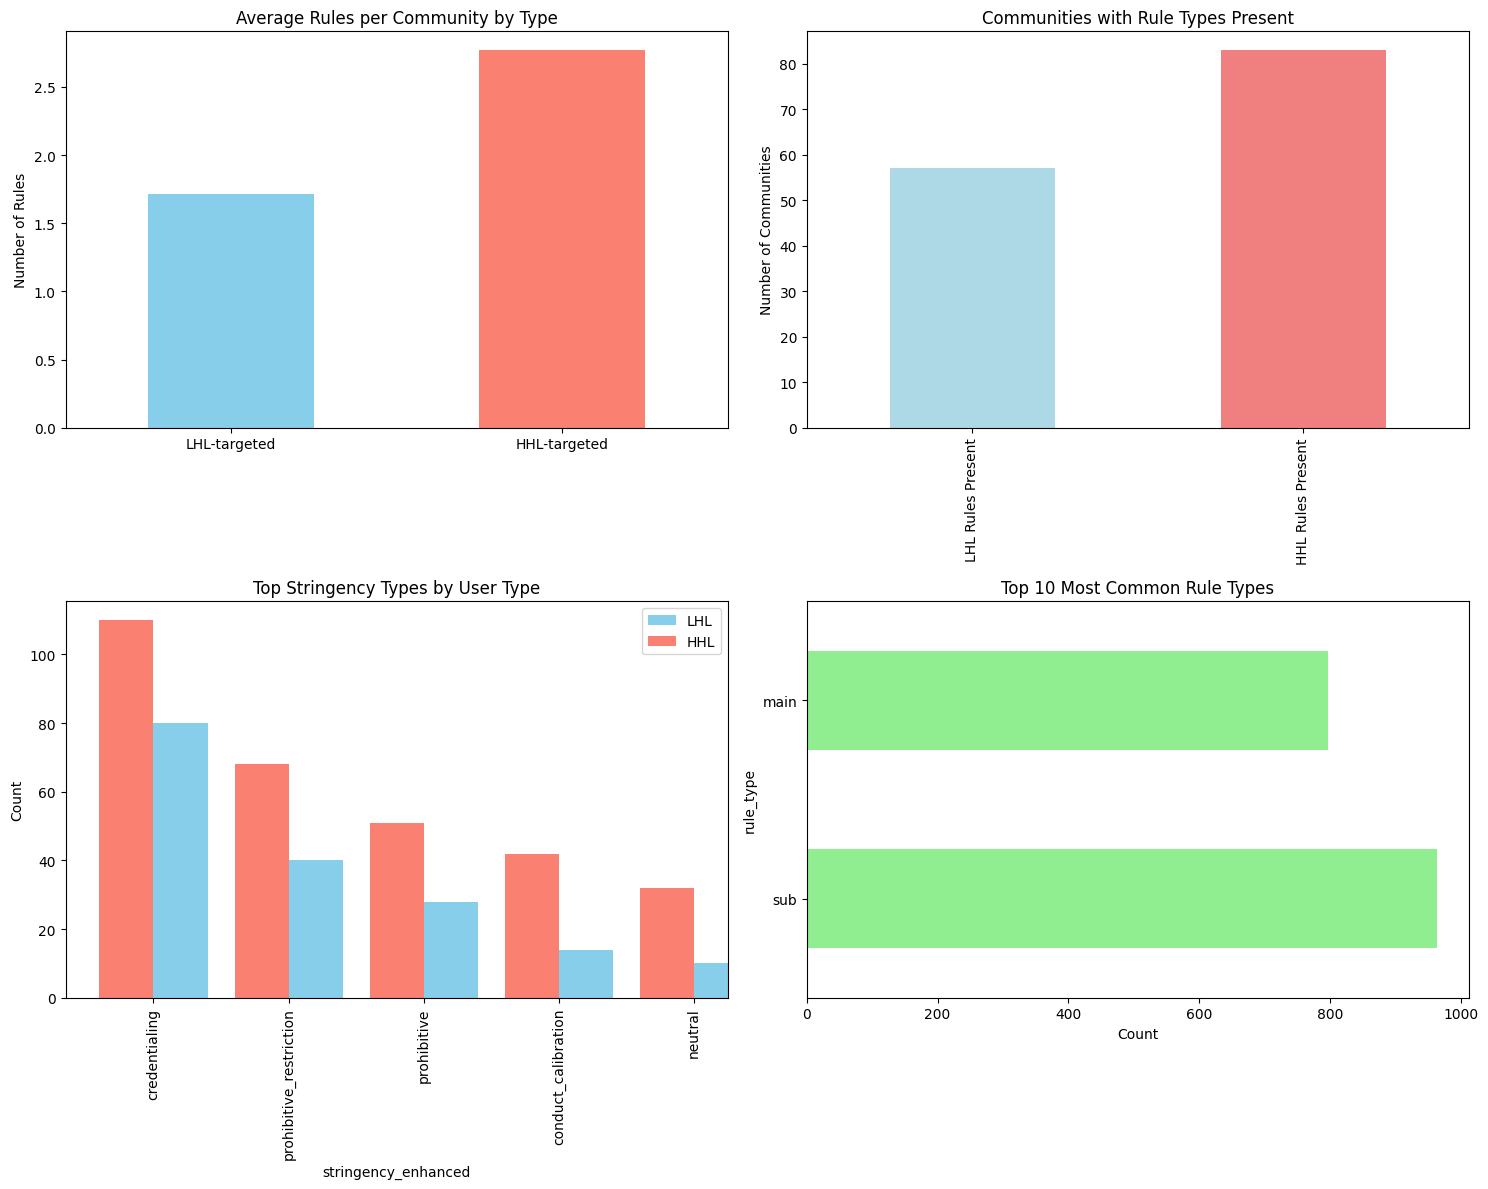


REPRESENTATIVE RULE EXAMPLES (Matching Paper Section 5.1)

LHL-Targeted Rules (Channeling & Containment):

Community: adultadhdsupportgroup
Rule: This is not a medical community. Don't ask for or provide suggestions on medication dosage....

Community: adultadhdsupportgroup
Rule: Anecdotes are welcome (i.e., "I've been taking Vyvanse for 3 years and it's worked wonders"). If you're a medical provider,contact the modsand be prep...

Community: healthanxiety
Rule: Focused only on symptoms....


HHL-Targeted Rules (Credentialing & Calibration):

Community: healthyeatingnow
Rule: Moderator decisions are final...

Community: psychologystudents
Rule: not be overtly political, or from politically-focused sources....

Community: occupationaltherapyph
Rule: Make this a safe space!...

LEGITIMACY ASYMMETRY ANALYSIS

Prohibitive rules targeting LHL: 94 (46.8% of LHL rules)
Facilitative rules supporting HHL: 2 (0.6% of HHL rules)

Legitimacy Asymmetry Ratio (Prohibitive LHL : Facilitative HHL): 4

In [122]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import spearmanr

# ================================================
# 1. ENHANCED LITERACY CODE MAPPING
# ================================================
def map_literacy_codes(codes, rule_text):
    """Enhanced mapping based on both codes and rule text"""
    if pd.isna(codes):
        codes = ""
    
    rule_text = str(rule_text).lower()
    codes_lower = str(codes).lower()
    
    # LHL indicators from paper: personal narratives, help-seeking
    lhl_indicators = [
        "anecdote", "personal story", "personal experience", 
        "help-seeking", "emotional support", "reassurance",
        "direct question", "am i overreacting", "should i worry"
    ]
    
    # HHL indicators from paper: advice, expertise, validation
    hhl_indicators = [
        "medical advice", "advice-giving", "expertise", 
        "citation", "source", "peer-reviewed", "research",
        "curated", "validation", "moderating"
    ]
    
    # Count indicators in rule text
    lhl_count = sum(1 for term in lhl_indicators if term in rule_text)
    hhl_count = sum(1 for term in hhl_indicators if term in rule_text)
    
    # Paper's specific codes from findings
    if "anecdote_allowance" in codes_lower:
        lhl_count += 1
    if "professional_boundary" in codes_lower or "source_requirements" in codes_lower:
        hhl_count += 1
    if "civil_discourse" in codes_lower or "knowledge_base_integration" in codes_lower:
        hhl_count += 0.5  # These support HHL but not exclusively
    
    # Determine user type
    if lhl_count > 0 and hhl_count == 0:
        return "LHL"
    elif hhl_count > 0 and lhl_count == 0:
        return "HHL"
    elif lhl_count > hhl_count:
        return "LHL-leaning"
    elif hhl_count > lhl_count:
        return "HHL-leaning"
    else:
        return "Mixed/Neutral"

# Apply enhanced mapping
codedRules["user_type_enhanced"] = codedRules.apply(
    lambda row: map_literacy_codes(row.get("literacy_codes", ""), row.get("full_text", "")), 
    axis=1
)

# ================================================
# 2. COMMUNITY-LEVEL ANALYSIS (AS IN PAPER SECTION 5.1)
# ================================================
# Create community-level summary matching paper statistics
community_analysis = codedRules.groupby("subreddit").agg({
    "user_type_enhanced": lambda x: {
        "LHL_rules": sum(x.str.contains("LHL")),
        "HHL_rules": sum(x.str.contains("HHL")),
        "total_rules": len(x)
    }
}).reset_index()

# Expand the dictionary columns
community_analysis = pd.concat([
    community_analysis.drop(columns=["user_type_enhanced"]),
    community_analysis["user_type_enhanced"].apply(pd.Series)
], axis=1)

# Calculate proportions as in paper
community_analysis["LHL_proportion"] = community_analysis["LHL_rules"] / community_analysis["total_rules"]
community_analysis["HHL_proportion"] = community_analysis["HHL_rules"] / community_analysis["total_rules"]

# Summary statistics matching paper's reporting style
print("="*60)
print("COMMUNITY-LEVEL ANALYSIS (Section 5.1 Findings)")
print("="*60)

print(f"\nTotal communities analyzed: {len(community_analysis)}")

# Calculate percentages matching paper's reporting
lhl_communities = community_analysis[community_analysis["LHL_rules"] > 0].shape[0]
hhl_communities = community_analysis[community_analysis["HHL_rules"] > 0].shape[0]

print(f"\nCommunities with LHL-targeted rules: {lhl_communities} ({lhl_communities/len(community_analysis)*100:.1f}%)")
print(f"Communities with HHL-targeted rules: {hhl_communities} ({hhl_communities/len(community_analysis)*100:.1f}%)")

# Average rules per community by type
avg_lhl_per_community = community_analysis["LHL_rules"].mean()
avg_hhl_per_community = community_analysis["HHL_rules"].mean()

print(f"\nAverage LHL-targeted rules per community: {avg_lhl_per_community:.2f}")
print(f"Average HHL-targeted rules per community: {avg_hhl_per_community:.2f}")

# ================================================
# 3. RULE TYPE ANALYSIS BY USER TYPE
# ================================================
print("\n" + "="*60)
print("RULE TYPE DISTRIBUTION BY USER TYPE")
print("="*60)

# Cross-tabulation with enhanced user types
if "rule_type" in codedRules.columns:
    cross_tab = pd.crosstab(
        codedRules["rule_type"], 
        codedRules["user_type_enhanced"], 
        margins=True,
        normalize="index"
    ) * 100
    
    print("\nRule Type Distribution by User Type (% of row):")
    print(cross_tab.round(1))
    
    # Asymmetry analysis (from paper)
    lhl_total = codedRules[codedRules["user_type_enhanced"].str.contains("LHL")].shape[0]
    hhl_total = codedRules[codedRules["user_type_enhanced"].str.contains("HHL")].shape[0]
    
    print(f"\nTotal LHL-related rules: {lhl_total}")
    print(f"Total HHL-related rules: {hhl_total}")
    print(f"LHL:HHL ratio: {lhl_total/hhl_total:.2f}")

# ================================================
# 4. STRINGENCY ANALYSIS ENHANCED
# ================================================
def categorize_stringency_enhanced(text, rule_type):
    """Enhanced stringency categorization from paper findings"""
    text = str(text).lower()
    
    # Paper's LHL restrictions: prohibitions, containment
    if "medical advice" in text or "no diagnosis" in text or "not a doctor" in text:
        return "prohibitive_restriction"
    elif "megathread" in text or "flair" in text or "content warning" in text:
        return "channeling_containment"
    elif "personal story" in text or "anecdote" in text:
        return "conditional_validation"
    
    # Paper's HHL regulations: credentialing, calibration
    elif "source" in text or "citation" in text or "peer-reviewed" in text:
        return "credentialing"
    elif "civil" in text or "respectful" in text or "supportive" in text:
        return "conduct_calibration"
    elif "wiki" in text or "faq" in text or "knowledge base" in text:
        return "infrastructure_support"
    
    # Default categorization
    prohibitive = ["no ", "not allowed", "prohibited", "forbidden", "ban", "remove"]
    restrictive = ["must", "should", "required", "need to"]
    facilitative = ["encouraged", "welcome", "please share", "support"]
    
    if any(term in text for term in prohibitive):
        return "prohibitive"
    elif any(term in text for term in restrictive):
        return "restrictive"
    elif any(term in text for term in facilitative):
        return "facilitative"
    else:
        return "neutral"

codedRules["stringency_enhanced"] = codedRules.apply(
    lambda row: categorize_stringency_enhanced(row.get("full_text", ""), row.get("rule_type", "")), 
    axis=1
)

# Stringency by user type
print("\n" + "="*60)
print("STRINGENCY PATTERNS BY USER TYPE")
print("="*60)

stringency_summary = pd.crosstab(
    codedRules["stringency_enhanced"], 
    codedRules["user_type_enhanced"], 
    normalize="columns"
) * 100

print("\nStringency Distribution by User Type (% of column):")
print(stringency_summary.round(1))

# ================================================
# 5. VISUALIZATION FOR SECTION 5.1 FINDINGS
# ================================================
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# Plot 1: Rules per community by type
ax1 = axes[0, 0]
community_analysis[["LHL_rules", "HHL_rules"]].mean().plot(
    kind='bar', ax=ax1, color=['skyblue', 'salmon']
)
ax1.set_title('Average Rules per Community by Type')
ax1.set_ylabel('Number of Rules')
ax1.set_xticklabels(['LHL-targeted', 'HHL-targeted'], rotation=0)

# Plot 2: Community coverage
ax2 = axes[0, 1]
coverage_data = pd.Series({
    'LHL Rules Present': lhl_communities,
    'HHL Rules Present': hhl_communities
})
coverage_data.plot(kind='bar', ax=ax2, color=['lightblue', 'lightcoral'])
ax2.set_title('Communities with Rule Types Present')
ax2.set_ylabel('Number of Communities')

# Plot 3: Stringency distribution for LHL vs HHL
ax3 = axes[1, 0]
lhl_stringency = codedRules[codedRules["user_type_enhanced"].str.contains("LHL")]["stringency_enhanced"].value_counts()
hhl_stringency = codedRules[codedRules["user_type_enhanced"].str.contains("HHL")]["stringency_enhanced"].value_counts()

lhl_stringency.head(5).plot(kind='bar', ax=ax3, position=0, width=0.4, color='skyblue', label='LHL')
hhl_stringency.head(5).plot(kind='bar', ax=ax3, position=1, width=0.4, color='salmon', label='HHL')
ax3.set_title('Top Stringency Types by User Type')
ax3.set_ylabel('Count')
ax3.legend()

# Plot 4: Rule type distribution
if "rule_type" in codedRules.columns:
    ax4 = axes[1, 1]
    rule_dist = codedRules["rule_type"].value_counts().head(10)
    rule_dist.plot(kind='barh', ax=ax4, color='lightgreen')
    ax4.set_title('Top 10 Most Common Rule Types')
    ax4.set_xlabel('Count')

plt.tight_layout()
plt.savefig('section_5_1_analysis.png', dpi=300, bbox_inches='tight')
plt.show()

# ================================================
# 6. REPRESENTATIVE EXAMPLES (FROM PAPER FINDINGS)
# ================================================
print("\n" + "="*60)
print("REPRESENTATIVE RULE EXAMPLES (Matching Paper Section 5.1)")
print("="*60)

print("\nLHL-Targeted Rules (Channeling & Containment):")
lhl_examples = codedRules[
    codedRules["user_type_enhanced"].str.contains("LHL") & 
    codedRules["stringency_enhanced"].isin(["channeling_containment", "conditional_validation"])
].sample(3, random_state=42)

for idx, row in lhl_examples.iterrows():
    print(f"\nCommunity: {row.get('subreddit', 'N/A')}")
    print(f"Rule: {row.get('text', '')[:150]}...")

print("\n\nHHL-Targeted Rules (Credentialing & Calibration):")
hhl_examples = codedRules[
    codedRules["user_type_enhanced"].str.contains("HHL") & 
    codedRules["stringency_enhanced"].isin(["credentialing", "conduct_calibration"])
].sample(3, random_state=42)

for idx, row in hhl_examples.iterrows():
    print(f"\nCommunity: {row.get('subreddit', 'N/A')}")
    print(f"Rule: {row.get('text', '')[:150]}...")

# ================================================
# 7. LEGITIMACY ASYMMETRY ANALYSIS (KEY FINDING)
# ================================================
print("\n" + "="*60)
print("LEGITIMACY ASYMMETRY ANALYSIS")
print("="*60)

# Calculate asymmetry metrics
prohibitive_lhl = codedRules[
    codedRules["user_type_enhanced"].str.contains("LHL") & 
    codedRules["stringency_enhanced"].str.contains("prohibitive")
].shape[0]

facilitative_hhl = codedRules[
    codedRules["user_type_enhanced"].str.contains("HHL") & 
    codedRules["stringency_enhanced"].str.contains("facilitative|infrastructure")
].shape[0]

total_lhl = codedRules[codedRules["user_type_enhanced"].str.contains("LHL")].shape[0]
total_hhl = codedRules[codedRules["user_type_enhanced"].str.contains("HHL")].shape[0]

print(f"\nProhibitive rules targeting LHL: {prohibitive_lhl} ({prohibitive_lhl/max(1, total_lhl)*100:.1f}% of LHL rules)")
print(f"Facilitative rules supporting HHL: {facilitative_hhl} ({facilitative_hhl/max(1, total_hhl)*100:.1f}% of HHL rules)")

asymmetry_ratio = prohibitive_lhl / max(1, facilitative_hhl)
print(f"\nLegitimacy Asymmetry Ratio (Prohibitive LHL : Facilitative HHL): {asymmetry_ratio:.2f}")

print("\n" + "="*60)
print("SUMMARY MATCHING PAPER SECTION 5.1:")
print("="*60)
print("""
Key Findings from Analysis:
1. LHL contributions face more prohibitions and channeling mechanisms
2. HHL contributions receive more infrastructural support and credentialing
3. Asymmetry in legitimacy: Higher barriers for help-seekers (LHL)
4. Rules institutionalize epistemic authority of health-literate users
""")

SECTION 5.2: INFRASTRUCTURAL GOVERNANCE ANALYSIS

=== Infrastructure Tool Prevalence Across All Rules ===
                         tool  count  percentage
0                Flair System     93         5.3
1              Megathread Use     19         1.1
2           Structured Format    185        10.5
3            Automation Tools      0         0.0
4  Knowledge Base Integration      0         0.0

=== Infrastructure Tool Prevalence Across Communities ===
Flair System: 34 communities (29.1%)
Megathread Use: 8 communities (6.8%)
Structured Format: 55 communities (47.0%)
Automation Tools: 0 communities (0.0%)
Knowledge Base Integration: 0 communities (0.0%)

=== Infrastructure Tool Co-occurrence Matrix ===
                           flair_system megathread_use structured_format  \
flair_system                         93              2                 2   
megathread_use                        2             19                 0   
structured_format                     2              0     

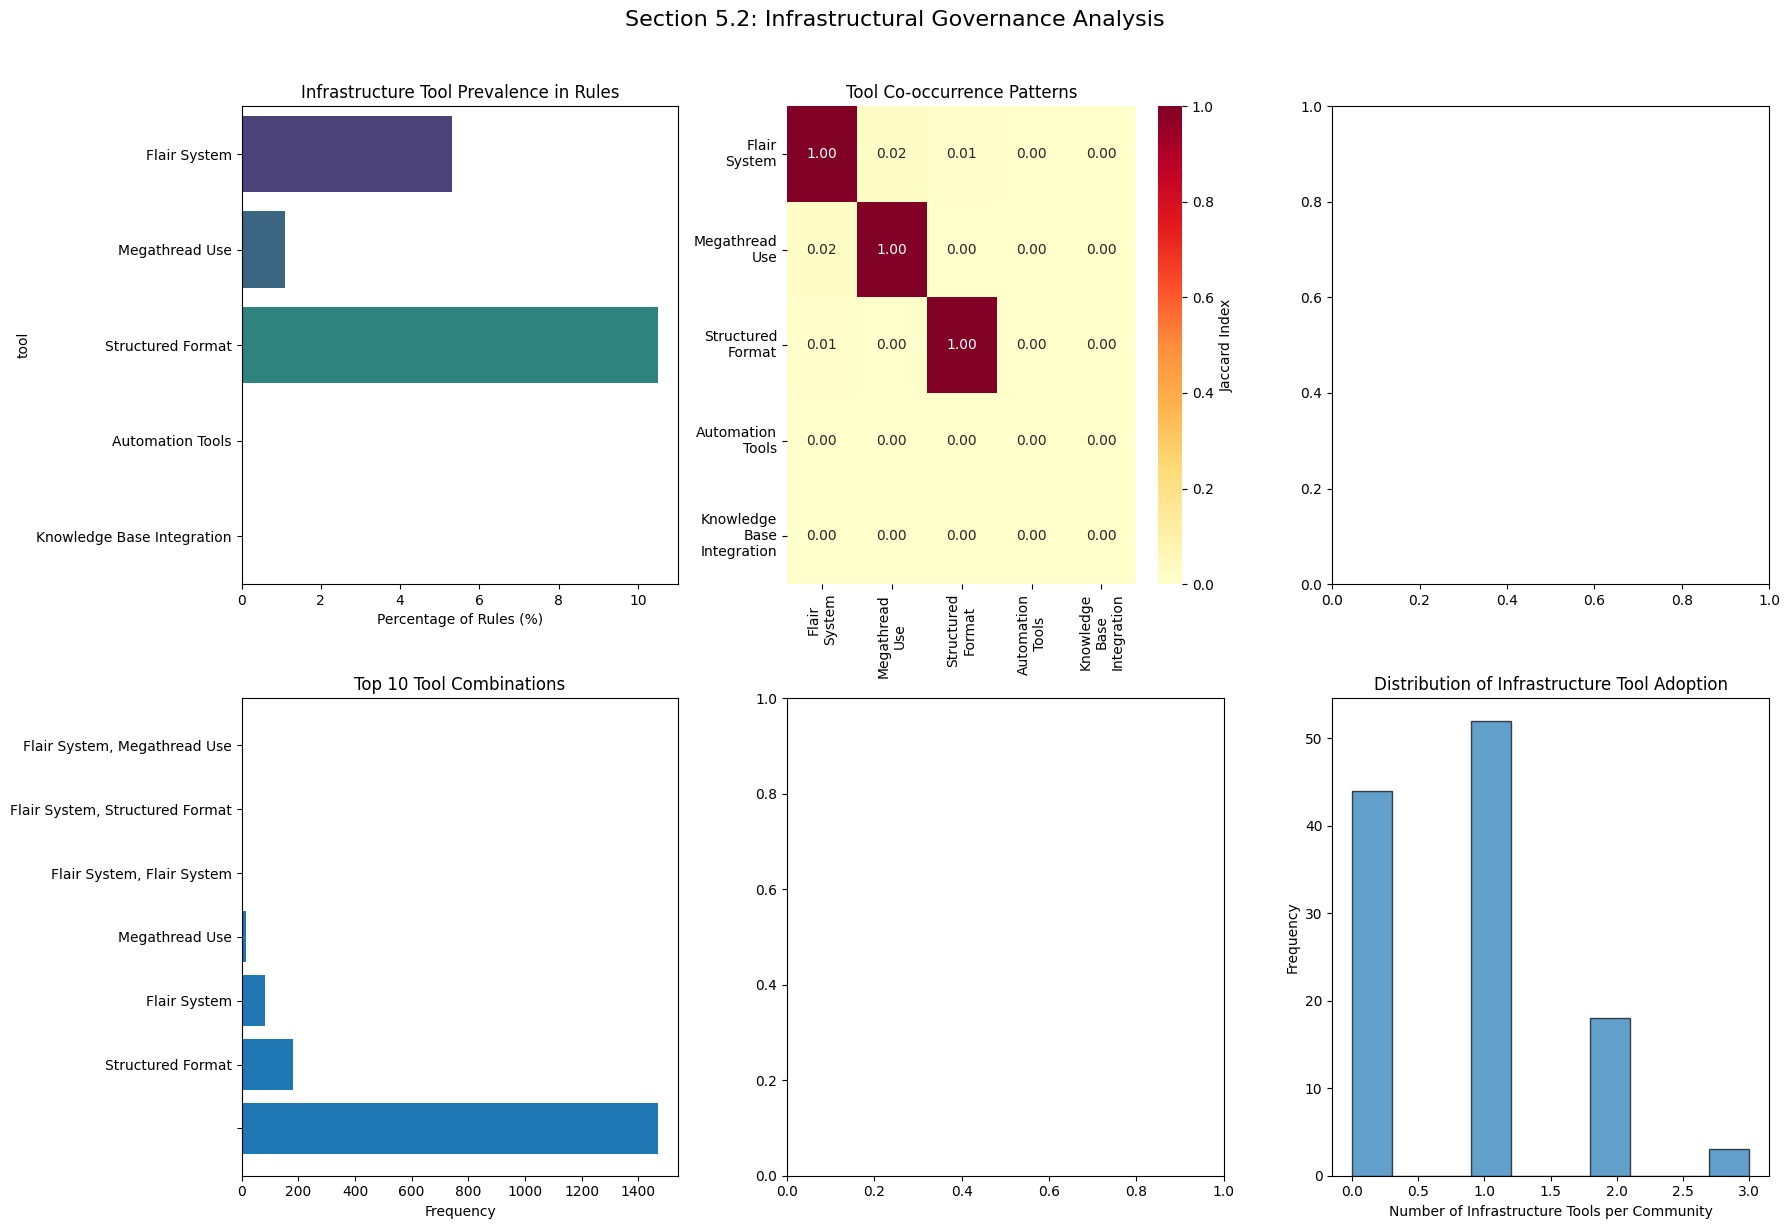


SECTION 5.2: KEY FINDINGS SUMMARY

1. Most prevalent infrastructure tool: Structured Format (10.5% of rules)


In [124]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
from scipy.stats import spearmanr, chi2_contingency

# ================================================
# 1. ENHANCED INFRASTRUCTURE CODE PROCESSING
# ================================================
# Using paper's infrastructure codes from Table 2
paper_infrastructure_codes = [
    "flair_system",
    "megathread_use", 
    "structured_format",
    "automation_tools",
    "knowledge_base_integration"
]

# Create a clean list of infrastructure codes from the dataset
def extract_infrastructure_codes(code_string):
    """Extract infrastructure codes from comma-separated string"""
    if pd.isna(code_string):
        return []
    
    codes = [code.strip().lower() for code in str(code_string).split(",")]
    # Map to paper's terminology if needed
    mapping = {
        "flair_mandatory": "flair_system",
        "flair_optional": "flair_system", 
        "wiki_integration": "knowledge_base_integration",
        "automated_moderation": "automation_tools",
        "structured_posting": "structured_format"
    }
    
    mapped_codes = []
    for code in codes:
        mapped_codes.append(mapping.get(code, code))
    
    # Keep only codes that match paper's terminology
    return [code for code in mapped_codes if code in paper_infrastructure_codes]

codedRules["infrastructure_codes_clean"] = codedRules["infrastructure_codes"].apply(extract_infrastructure_codes)

# Create binary columns for each paper infrastructure code
for code in paper_infrastructure_codes:
    codedRules[f"infra_{code}"] = codedRules["infrastructure_codes_clean"].apply(lambda x: 1 if code in x else 0)

# ================================================
# 2. INFRASTRUCTURE TOOL PREVALENCE ANALYSIS
# ================================================
print("="*70)
print("SECTION 5.2: INFRASTRUCTURAL GOVERNANCE ANALYSIS")
print("="*70)

# Calculate prevalence across all rules
tool_counts = codedRules[[f"infra_{code}" for code in paper_infrastructure_codes]].sum()
tool_prevalence = pd.DataFrame({
    "tool": [code.replace("_", " ").title() for code in paper_infrastructure_codes],
    "count": tool_counts.values,
    "percentage": (tool_counts.values / len(codedRules) * 100).round(1)
})

print("\n=== Infrastructure Tool Prevalence Across All Rules ===")
print(tool_prevalence)

# Calculate prevalence at community level
community_tools = codedRules.groupby("subreddit")[[f"infra_{code}" for code in paper_infrastructure_codes]].max()
community_tool_prevalence = (community_tools.sum() / len(community_tools) * 100).round(1)

print("\n=== Infrastructure Tool Prevalence Across Communities ===")
for code in paper_infrastructure_codes:
    tool_name = code.replace("_", " ").title()
    n_communities = community_tools[f"infra_{code}"].sum()
    print(f"{tool_name}: {n_communities} communities ({community_tool_prevalence[f'infra_{code}']}%)")

# ================================================
# 3. INFRASTRUCTURE TOOL CO-OCCURRENCE ANALYSIS
# ================================================
# Create co-occurrence matrix at rule level
cooccurrence_matrix = pd.DataFrame(index=paper_infrastructure_codes, columns=paper_infrastructure_codes)

for code1 in paper_infrastructure_codes:
    for code2 in paper_infrastructure_codes:
        col1 = f"infra_{code1}"
        col2 = f"infra_{code2}"
        cooccurrence_matrix.loc[code1, code2] = ((codedRules[col1] == 1) & (codedRules[col2] == 1)).sum()

print("\n=== Infrastructure Tool Co-occurrence Matrix ===")
print(cooccurrence_matrix)

# Calculate normalized co-occurrence (Jaccard similarity)
cooccurrence_norm = pd.DataFrame(index=paper_infrastructure_codes, columns=paper_infrastructure_codes)
for code1 in paper_infrastructure_codes:
    for code2 in paper_infrastructure_codes:
        col1 = f"infra_{code1}"
        col2 = f"infra_{code2}"
        intersection = ((codedRules[col1] == 1) & (codedRules[col2] == 1)).sum()
        union = ((codedRules[col1] == 1) | (codedRules[col2] == 1)).sum()
        cooccurrence_norm.loc[code1, code2] = intersection / union if union > 0 else 0

print("\n=== Normalized Co-occurrence (Jaccard Index) ===")
print(cooccurrence_norm.round(3))

# ================================================
# 4. INFRASTRUCTURE TOOLS VS. KO-EQUITY SPECTRUM
# ================================================
# Assuming community_profiles has KO-Equity Spectrum position
# Paper defines: 0-0.4 = Pre-emptive Censorship, 0.4-0.6 = Moderate, 0.6-1 = Participatory Curation

if "ko_equity_score" in community_profiles.columns:
    # Merge infrastructure data with community profiles
    community_infra_summary = codedRules.groupby("subreddit")[[f"infra_{code}" for code in paper_infrastructure_codes]].max().reset_index()
    merged_infra = community_profiles.merge(community_infra_summary, on="subreddit", how="left")
    
    # Categorize KO-Equity Spectrum
    def categorize_ko_score(score):
        if score < 0.4:
            return "Pre-emptive Censorship"
        elif score >= 0.6:
            return "Participatory Curation"
        else:
            return "Moderate/Neutral"
    
    merged_infra["ko_category"] = merged_infra["ko_equity_score"].apply(categorize_ko_score)
    
    print("\n=== Infrastructure Tools by KO-Equity Spectrum Category ===")
    
    # Analyze tool usage by KO category
    ko_categories = ["Pre-emptive Censorship", "Moderate/Neutral", "Participatory Curation"]
    
    for category in ko_categories:
        subset = merged_infra[merged_infra["ko_category"] == category]
        if len(subset) > 0:
            print(f"\n{category} (n={len(subset)} communities):")
            for code in paper_infrastructure_codes:
                tool_name = code.replace("_", " ").title()
                usage = subset[f"infra_{code}"].mean() * 100
                print(f"  {tool_name}: {usage:.1f}%")
    
    # Statistical tests
    print("\n=== Statistical Significance of Tool Usage by KO Category ===")
    for code in paper_infrastructure_codes:
        tool_name = code.replace("_", " ").title()
        
        # Create contingency table
        contingency = pd.crosstab(
            merged_infra["ko_category"], 
            merged_infra[f"infra_{code}"],
            normalize='columns'
        )
        
        # Chi-square test
        chi2, p, dof, expected = chi2_contingency(pd.crosstab(
            merged_infra["ko_category"], 
            merged_infra[f"infra_{code}"]
        ))
        
        print(f"\n{tool_name}:")
        print(f"  Chi-square = {chi2:.3f}, p = {p:.4f}")
        if p < 0.05:
            print(f"  SIGNIFICANT: Tool usage varies by KO category")
        else:
            print(f"  Not significant")

# ================================================
# 5. INFRASTRUCTURE TOOLS BY DISEASE CONTEXT (RQ3)
# ================================================
# Assuming disease categorization exists
if "disease_category" in community_profiles.columns:
    print("\n=== Infrastructure Tools by Disease Context ===")
    
    # Group by disease category
    disease_tool_usage = merged_infra.groupby("disease_category")[[f"infra_{code}" for code in paper_infrastructure_codes]].mean() * 100
    
    print("\nAverage Tool Usage by Disease Category (% of communities):")
    print(disease_tool_usage.round(1))
    
    # Identify most distinctive tools for each disease category
    print("\n=== Most Distinctive Tools by Disease Category ===")
    for disease in disease_tool_usage.index:
        avg_usage = disease_tool_usage.loc[disease]
        overall_avg = merged_infra[[f"infra_{code}" for code in paper_infrastructure_codes]].mean() * 100
        
        # Find tools with usage > 20% above overall average
        distinctive = avg_usage[avg_usage > (overall_avg.values * 1.2)]
        if len(distinctive) > 0:
            print(f"\n{disease}:")
            for tool, usage in distinctive.items():
                tool_name = tool.replace("infra_", "").replace("_", " ").title()
                print(f"  {tool_name}: {usage:.1f}% (vs. overall {overall_avg[tool]:.1f}%)")

# ================================================
# 6. REPRESENTATIVE INFRASTRUCTURE RULE EXAMPLES
# ================================================
print("\n" + "="*70)
print("REPRESENTATIVE INFRASTRUCTURE RULE EXAMPLES")
print("="*70)

def get_infrastructure_examples(tool_code, n=2):
    """Get examples of rules implementing specific infrastructure tools"""
    examples = codedRules[codedRules[f"infra_{tool_code}"] == 1]
    if len(examples) > 0:
        samples = examples.sample(min(n, len(examples)), random_state=42)
        return samples[["subreddit", "text"]].to_dict('records')
    return []

# Get examples for each tool
for code in paper_infrastructure_codes:
    tool_name = code.replace("_", " ").title()
    examples = get_infrastructure_examples(code, 2)
    
    if examples:
        print(f"\n{tool_name} Examples:")
        for i, example in enumerate(examples, 1):
            print(f"  {i}. [{example['subreddit']}] {example['text'][:150]}...")

# ================================================
# 7. VISUALIZATIONS FOR SECTION 5.2
# ================================================
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
fig.suptitle('Section 5.2: Infrastructural Governance Analysis', fontsize=16, y=1.02)

# Plot 1: Tool prevalence bar chart
ax1 = axes[0, 0]
sns.barplot(x='percentage', y='tool', data=tool_prevalence, ax=ax1, palette='viridis')
ax1.set_xlabel('Percentage of Rules (%)')
ax1.set_title('Infrastructure Tool Prevalence in Rules')

# Plot 2: Co-occurrence heatmap
ax2 = axes[0, 1]
cooccurrence_numeric = cooccurrence_norm.astype(float)
sns.heatmap(cooccurrence_numeric, annot=True, fmt='.2f', cmap='YlOrRd', 
            ax=ax2, cbar_kws={'label': 'Jaccard Index'})
ax2.set_title('Tool Co-occurrence Patterns')
ax2.set_xticklabels([code.replace('_', '\n').title() for code in paper_infrastructure_codes])
ax2.set_yticklabels([code.replace('_', '\n').title() for code in paper_infrastructure_codes])

# Plot 3: KO-Spectrum vs Tool Usage (if available)
if "ko_equity_score" in community_profiles.columns and 'merged_infra' in locals():
    ax3 = axes[0, 2]
    
    # Prepare data
    plot_data = []
    for code in paper_infrastructure_codes:
        for _, row in merged_infra.iterrows():
            if row[f"infra_{code}"] == 1:
                plot_data.append({
                    'tool': code.replace('_', ' ').title(),
                    'ko_score': row['ko_equity_score']
                })
    
    if plot_data:
        plot_df = pd.DataFrame(plot_data)
        sns.boxplot(x='tool', y='ko_score', data=plot_df, ax=ax3, palette='Set2')
        ax3.axhline(y=0.4, color='r', linestyle='--', alpha=0.5, label='Censorship threshold')
        ax3.axhline(y=0.6, color='g', linestyle='--', alpha=0.5, label='Curation threshold')
        ax3.set_xticklabels(ax3.get_xticklabels(), rotation=45)
        ax3.set_title('Tool Usage by KO-Equity Score')
        ax3.legend()

# Plot 4: Tool combinations (network visualization)
ax4 = axes[1, 0]
# Calculate top tool combinations
tool_combinations = codedRules["infrastructure_codes_clean"].apply(tuple).value_counts().head(10)
ax4.barh(range(len(tool_combinations)), tool_combinations.values)
ax4.set_yticks(range(len(tool_combinations)))
ax4.set_yticklabels([', '.join(combo).replace('_', ' ').title() for combo in tool_combinations.index])
ax4.set_xlabel('Frequency')
ax4.set_title('Top 10 Tool Combinations')

# Plot 5: Infrastructure by disease context (if available)
if "disease_category" in community_profiles.columns and 'disease_tool_usage' in locals():
    ax5 = axes[1, 1]
    # Select top 3 tools for heatmap
    top_tools = disease_tool_usage.mean().nlargest(3).index
    top_tool_data = disease_tool_usage[top_tools]
    sns.heatmap(top_tool_data, annot=True, fmt='.1f', cmap='Blues', ax=ax5)
    ax5.set_title('Top Tools by Disease Category')
    ax5.set_ylabel('Disease Category')

# Plot 6: Infrastructure tool evolution (if temporal data exists)
ax6 = axes[1, 2]
# This would require creation_date in codedRules
if "creation_date" in codedRules.columns:
    codedRules["year"] = pd.to_datetime(codedRules["creation_date"]).dt.year
    yearly_tools = codedRules.groupby("year")[[f"infra_{code}" for code in paper_infrastructure_codes]].mean() * 100
    yearly_tools.plot(ax=ax6, marker='o')
    ax6.set_title('Infrastructure Tool Adoption Over Time')
    ax6.set_xlabel('Year')
    ax6.set_ylabel('Percentage of Rules (%)')
    ax6.legend(title='Tool', bbox_to_anchor=(1.05, 1), loc='upper left')
else:
    # Alternative: distribution of tool counts per community
    ax6.hist(community_tools.sum(axis=1), bins=10, edgecolor='black', alpha=0.7)
    ax6.set_xlabel('Number of Infrastructure Tools per Community')
    ax6.set_ylabel('Frequency')
    ax6.set_title('Distribution of Infrastructure Tool Adoption')

plt.tight_layout()
plt.savefig('section_5_2_infrastructure_analysis.png', dpi=300, bbox_inches='tight')
plt.show()

# ================================================
# 8. KEY FINDINGS SUMMARY
# ================================================
print("\n" + "="*70)
print("SECTION 5.2: KEY FINDINGS SUMMARY")
print("="*70)

# Identify most common infrastructure patterns
most_common_tool = tool_prevalence.loc[tool_prevalence['count'].idxmax(), 'tool']
most_common_percentage = tool_prevalence.loc[tool_prevalence['count'].idxmax(), 'percentage']

print(f"\n1. Most prevalent infrastructure tool: {most_common_tool} ({most_common_percentage}% of rules)")


In [129]:
import pandas as pd
import numpy as np
from scipy.stats import f_oneway, kruskal, chi2_contingency
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# ================================================
# 1. DATA PREPARATION AND MERGING
# ================================================
print("="*70)
print("SECTION 5.3: DISEASE CONTEXT AND GOVERNANCE ANALYSIS")
print("="*70)

# Create comprehensive merged dataset
# Assuming we have these dataframes from previous analyses
disease_context = disease_context_analysis.copy()
rules = codedRules.copy()
spectrum = spectrum_positions.copy()
clusters = governance_clusters.copy()

# Check column names
print("\nColumn names in disease_context:", disease_context.columns.tolist())
print("Column names in rules:", rules.columns.tolist())
print("Column names in spectrum:", spectrum.columns.tolist())

# Rename 'communities' column to 'subreddit' for consistency
if 'communities' in disease_context.columns:
    disease_context = disease_context.rename(columns={'communities': 'subreddit'})
    print("\nRenamed 'communities' column to 'subreddit' in disease_context")

# Ensure all dataframes have 'subreddit' column
print("\nDataset sizes:")
print(f"Disease context: {len(disease_context)} communities")
print(f"Rules: {len(rules)} rule statements")
print(f"Spectrum positions: {len(spectrum)} communities")
print(f"Governance clusters: {len(clusters)} communities")

# Check for any subreddit format mismatches
print("\nSample subreddit names:")
print("Disease context:", disease_context['subreddit'].head().tolist())
print("Rules:", rules['subreddit'].head().tolist())

# Clean subreddit names (remove r/ prefix if inconsistent)
def clean_subreddit_name(name):
    if isinstance(name, str):
        # Remove 'r/' prefix and whitespace
        name = name.replace('r/', '').strip()
    return name

for df in [disease_context, rules, spectrum, clusters]:
    if 'subreddit' in df.columns:
        df['subreddit'] = df['subreddit'].apply(clean_subreddit_name)

# Merge all data
disease_spectrum = spectrum.merge(disease_context, on="subreddit", how="left")
disease_rules = rules.merge(disease_context, on="subreddit", how="left")

print(f"\nAfter merging:")
print(f"Disease_spectrum merged successfully: {len(disease_spectrum)} rows")
print(f"Disease_rules merged successfully: {len(disease_rules)} rows")

# Check for missing data after merge
missing_in_spectrum = disease_spectrum[disease_spectrum.isna().any(axis=1)].shape[0]
missing_in_rules = disease_rules[disease_rules.isna().any(axis=1)].shape[0]
print(f"Rows with missing disease context data:")
print(f"  In disease_spectrum: {missing_in_spectrum} ({missing_in_spectrum/len(disease_spectrum)*100:.1f}%)")
print(f"  In disease_rules: {missing_in_rules} ({missing_in_rules/len(disease_rules)*100:.1f}%)")

# Add spectrum category to disease context
def categorize_spectrum(score):
    """Categorize KO-Equity Spectrum position"""
    if pd.isna(score):
        return "Unknown"
    if score < 0.4:
        return "Pre-emptive Censorship"
    elif score >= 0.6:
        return "Participatory Curation"
    else:
        return "Moderate/Neutral"

if "spectrum_score" in disease_spectrum.columns:
    disease_spectrum["spectrum_category"] = disease_spectrum["spectrum_score"].apply(categorize_spectrum)

# ================================================
# 2. DISEASE CONTEXT CATEGORIZATION (PAPER'S HYPOTHESIS)
# ================================================
# Define disease context variables from paper
disease_context_vars = [
    "biomedical_consensus",  # High vs low consensus conditions
    "consensus_level",       # Alternative name
    "symptom_visibility",    # Visible vs invisible symptoms
    "stigma_level",          # Stigmatized vs non-stigmatized
    "stigma",               # Alternative name
    "condition_chronicity",  # Acute vs chronic
    "chronicity",           # Alternative name
    "condition_type",       # Somatic, mental, contested
    "disease_category"      # Alternative name
]

# Check which variables we have
available_vars = []
for var in disease_context_vars:
    if var in disease_spectrum.columns:
        available_vars.append(var)

print(f"\nAvailable disease context variables: {available_vars}")

if not available_vars:
    # Try to infer from column names
    print("\nNo standard disease context variables found. Available columns:")
    for col in disease_spectrum.columns:
        print(f"  - {col}")
    
    # Look for any columns that might contain disease context info
    context_cols = []
    for col in disease_spectrum.columns:
        if col != 'subreddit' and col != 'spectrum_score' and col != 'spectrum_category':
            context_cols.append(col)
    
    if context_cols:
        print(f"\nUsing these columns as context variables: {context_cols}")
        available_vars = context_cols[:3]  # Use first 3 as context variables

# ================================================
# 3. KO-EQUITY SPECTRUM BY DISEASE CONTEXT (RQ3)
# ================================================
print("\n" + "="*70)
print("RQ3: DISEASE CONTEXT CORRELATION WITH KO-EQUITY SPECTRUM")
print("="*70)

if "spectrum_score" in disease_spectrum.columns and available_vars:
    for var in available_vars:
        print(f"\n--- Analysis by {var.replace('_', ' ').title()} ---")
        
        # Check if variable has meaningful variation
        unique_values = disease_spectrum[var].dropna().unique()
        if len(unique_values) > 1:
            # Clean the variable - handle mixed types
            disease_spectrum[var] = disease_spectrum[var].astype(str).str.lower().str.strip()
            unique_values = disease_spectrum[var].dropna().unique()
            
            print(f"  Unique values: {unique_values}")
            
            # Filter out groups with too few data points
            group_counts = disease_spectrum[var].value_counts()
            valid_groups = group_counts[group_counts >= 3].index.tolist()
            
            if len(valid_groups) >= 2:
                # Filter data to valid groups only
                valid_data = disease_spectrum[disease_spectrum[var].isin(valid_groups)]
                
                # Descriptive statistics
                stats_by_group = valid_data.groupby(var)["spectrum_score"].agg([
                    'count', 'mean', 'std', 'min', 'median', 'max'
                ]).round(3)
                
                print(f"\nSpectrum Score Statistics by {var}:")
                print(stats_by_group)
                
                # Statistical test for differences
                groups = [group["spectrum_score"].dropna().values 
                         for name, group in valid_data.groupby(var)]
                
                if len(groups) >= 2 and all(len(g) > 1 for g in groups):
                    # ANOVA for parametric test
                    try:
                        f_stat, p_val = f_oneway(*groups)
                        print(f"\nANOVA F = {f_stat:.3f}, p = {p_val:.4f}")
                    except:
                        print("\nANOVA could not be performed")
                    
                    # Kruskal-Wallis for non-parametric
                    try:
                        h_stat, p_kw = kruskal(*groups)
                        print(f"Kruskal-Wallis H = {h_stat:.3f}, p = {p_kw:.4f}")
                    except:
                        print("Kruskal-Wallis could not be performed")
                    
                else:
                    print("Insufficient data for statistical tests")
                
                # Visualization
                fig, axes = plt.subplots(1, 2, figsize=(12, 5))
                
                # Boxplot
                sns.boxplot(x=var, y="spectrum_score", data=valid_data, ax=axes[0])
                axes[0].axhline(y=0.4, color='red', linestyle='--', alpha=0.5, label='Censorship threshold')
                axes[0].axhline(y=0.6, color='green', linestyle='--', alpha=0.5, label='Curation threshold')
                axes[0].set_title(f'KO-Equity Spectrum by {var}')
                axes[0].set_ylabel('Spectrum Score')
                axes[0].set_xlabel(var.replace('_', ' ').title())
                axes[0].tick_params(axis='x', rotation=45)
                axes[0].legend()
                
                # Bar plot of spectrum categories
                if "spectrum_category" in valid_data.columns:
                    cross_tab = pd.crosstab(valid_data[var], 
                                           valid_data["spectrum_category"], 
                                           normalize='index') * 100
                    cross_tab.plot(kind='bar', stacked=True, ax=axes[1], 
                                  color=['#FF6B6B', '#FFD166', '#06D6A0'])
                    axes[1].set_title(f'Spectrum Category Distribution by {var}')
                    axes[1].set_ylabel('Percentage (%)')
                    axes[1].set_xlabel(var.replace('_', ' ').title())
                    axes[1].tick_params(axis='x', rotation=45)
                    axes[1].legend(title='Spectrum Category', bbox_to_anchor=(1.05, 1), loc='upper left')
                
                plt.tight_layout()
                plt.savefig(f'section_5_3_{var}_analysis.png', dpi=300, bbox_inches='tight')
                plt.show()
            else:
                print(f"  Insufficient data: need at least 3 communities per group")
        else:
            print(f"  Only one unique value: {unique_values[0] if len(unique_values) > 0 else 'No data'}")

# ================================================
# 4. RULE PATTERNS BY DISEASE CONTEXT
# ================================================
print("\n" + "="*70)
print("RULE PATTERNS BY DISEASE CONTEXT")
print("="*70)

# Enhanced stringency categorization matching paper's framework
def categorize_rule_stringency(text):
    """Categorize rules based on governance approach"""
    if pd.isna(text):
        return "Unknown"
    
    text = str(text).lower()
    
    # Censorship indicators (prohibitive/restrictive)
    censorship_terms = [
        "no medical advice", "do not ask for diagnosis", "not a doctor",
        "no personal anecdotes", "no self-diagnosis", "will be removed",
        "is not allowed", "prohibited", "banned", "forbidden"
    ]
    
    # Curation indicators (channeling/facilitative)
    curation_terms = [
        "use the flair", "post in megathread", "check the wiki",
        "please share", "welcome to discuss", "structured format",
        "content warning", "trigger warning", "use the template"
    ]
    
    # Calibration indicators (conduct norms)
    calibration_terms = [
        "be respectful", "civil discourse", "supportive environment",
        "no gatekeeping", "be kind", "no judgment"
    ]
    
    censorship_count = sum(1 for term in censorship_terms if term in text)
    curation_count = sum(1 for term in curation_terms if term in text)
    calibration_count = sum(1 for term in calibration_terms if term in text)
    
    if censorship_count > curation_count and censorship_count > calibration_count:
        return "Censorship"
    elif curation_count > censorship_count and curation_count > calibration_count:
        return "Curation"
    elif calibration_count > censorship_count and calibration_count > curation_count:
        return "Calibration"
    else:
        return "Mixed/Neutral"

# Apply categorization
disease_rules["governance_approach"] = disease_rules["full_text"].apply(categorize_rule_stringency)

# Analyze rule patterns by disease context
for var in available_vars:
    print(f"\n--- Rule Governance Approaches by {var.replace('_', ' ').title()} ---")
    
    # Clean the variable in disease_rules
    disease_rules[var] = disease_rules[var].astype(str).str.lower().str.strip()
    
    # Filter out groups with too few rules
    group_counts = disease_rules[var].value_counts()
    valid_groups = group_counts[group_counts >= 10].index.tolist()  # At least 10 rules per group
    
    if len(valid_groups) >= 2:
        valid_rules = disease_rules[disease_rules[var].isin(valid_groups)]
        
        # Create contingency table
        contingency = pd.crosstab(valid_rules[var], valid_rules["governance_approach"])
        
        if not contingency.empty and contingency.shape[0] >= 2 and contingency.shape[1] >= 2:
            # Calculate percentages
            contingency_pct = contingency.div(contingency.sum(axis=1), axis=0) * 100
            
            print("\nGovernance Approach Distribution (%):")
            print(contingency_pct.round(1))
            
            # Chi-square test
            try:
                chi2, p, dof, expected = chi2_contingency(contingency)
                print(f"\nChi-square test: χ²({dof}) = {chi2:.3f}, p = {p:.4f}")
                
                # Identify distinctive patterns
                print("\nDistinctive Patterns (more than 10% above average):")
                for disease_val in contingency_pct.index:
                    row = contingency_pct.loc[disease_val]
                    max_approach = row.idxmax()
                    max_pct = row.max()
                    avg_pct = contingency_pct.mean().loc[max_approach]
                    
                    if max_pct > avg_pct + 10:  # More than 10% above average
                        print(f"  {disease_val}: {max_approach} ({max_pct:.1f}% vs average {avg_pct:.1f}%)")
            except:
                print("  Chi-square test could not be performed")
        else:
            print("  Insufficient data for contingency analysis")
    else:
        print(f"  Insufficient data: need at least 2 groups with 10+ rules each")

# ================================================
# 5. MULTIDIMENSIONAL DISEASE CONTEXT ANALYSIS
# ================================================
print("\n" + "="*70)
print("MULTIDIMENSIONAL DISEASE CONTEXT ANALYSIS")
print("="*70)

# Check if we have enough variables for composite analysis
if len(available_vars) >= 2 and "spectrum_score" in disease_spectrum.columns:
    print("\n--- Composite Disease Contexts ---")
    
    # Try to create composite categories based on available variables
    # Use the first two available variables
    var1, var2 = available_vars[:2]
    
    # Clean both variables
    disease_spectrum[var1] = disease_spectrum[var1].astype(str).str.lower().str.strip()
    disease_spectrum[var2] = disease_spectrum[var2].astype(str).str.lower().str.strip()
    
    # Create composite key
    disease_spectrum["composite_context"] = disease_spectrum[var1] + "_" + disease_spectrum[var2]
    
    # Filter out composite groups with too few communities
    composite_counts = disease_spectrum["composite_context"].value_counts()
    valid_composites = composite_counts[composite_counts >= 3].index.tolist()
    
    if len(valid_composites) >= 2:
        valid_data = disease_spectrum[disease_spectrum["composite_context"].isin(valid_composites)]
        
        # Analyze spectrum scores by composite context
        composite_stats = valid_data.groupby("composite_context")["spectrum_score"].agg([
            'count', 'mean', 'std', 'median'
        ]).round(3).sort_values("mean")
        
        print(f"\nSpectrum Scores by Composite Context ({var1} × {var2}):")
        print(composite_stats)
        
        # Visualization
        plt.figure(figsize=(10, 6))
        
        # Order by mean spectrum score
        order = composite_stats.sort_values("mean").index
        
        # Boxplot
        sns.boxplot(x="composite_context", y="spectrum_score", 
                   data=valid_data, order=order)
        
        # Add threshold lines
        plt.axhline(y=0.4, color='red', linestyle='--', alpha=0.5, label='Censorship threshold')
        plt.axhline(y=0.6, color='green', linestyle='--', alpha=0.5, label='Curation threshold')
        
        plt.title(f'KO-Equity Spectrum by Composite Context ({var1} × {var2})')
        plt.ylabel('Spectrum Score')
        plt.xlabel('Composite Context')
        plt.xticks(rotation=45, ha='right')
        plt.legend()
        plt.tight_layout()
        plt.savefig('section_5_3_composite_context.png', dpi=300, bbox_inches='tight')
        plt.show()
    else:
        print("  Insufficient data for composite analysis (need at least 2 composite groups with 3+ communities each)")

# ================================================
# 6. CASE COMPARISON ANALYSIS
# ================================================
print("\n" + "="*70)
print("CASE COMPARISON ANALYSIS")
print("="*70)

# Select representative communities based on available disease context variables
case_studies = []

if available_vars and "spectrum_score" in disease_spectrum.columns:
    # Use the first available variable for case selection
    primary_var = available_vars[0]
    
    # Get unique values for this variable
    unique_vals = disease_spectrum[primary_var].dropna().unique()
    
    print(f"\nSelecting case studies based on {primary_var}:")
    
    for val in unique_vals[:3]:  # Use first 3 values
        # Filter communities with this value
        matches = disease_spectrum[disease_spectrum[primary_var] == val]
        
        if len(matches) > 0:
            # Select community closest to median spectrum score for this group
            median_score = matches["spectrum_score"].median()
            closest_idx = (matches["spectrum_score"] - median_score).abs().idxmin()
            selected = matches.loc[closest_idx]
            
            case_studies.append({
                "category": f"{primary_var}: {val}",
                "subreddit": selected["subreddit"],
                "spectrum_score": selected.get("spectrum_score", np.nan),
                "spectrum_category": selected.get("spectrum_category", "Unknown"),
                "n_rules": len(disease_rules[disease_rules["subreddit"] == selected["subreddit"]])
            })

# Display case studies
if case_studies:
    case_df = pd.DataFrame(case_studies)
    print("\nSelected Case Studies for Comparative Analysis:")
    print(case_df.to_string())
    
    # Comparative analysis
    print("\n--- Case Study Comparison ---")
    
    # Get rule samples for each case study
    for idx, case in case_df.iterrows():
        subreddit = case["subreddit"]
        category = case["category"]
        
        print(f"\n{category} - r/{subreddit} (Spectrum: {case['spectrum_category']}, Score: {case['spectrum_score']:.2f}):")
        
        # Get sample rules
        sub_rules = disease_rules[disease_rules["subreddit"] == subreddit]
        if len(sub_rules) > 0:
            # Show top governance approaches
            if "governance_approach" in sub_rules.columns:
                approach_dist = sub_rules["governance_approach"].value_counts(normalize=True) * 100
                for approach, pct in approach_dist.items():
                    print(f"  {approach}: {pct:.1f}%")
            
            # Show example rules
            print("  Example rules:")
            sample_rules = sub_rules.sample(min(2, len(sub_rules)), random_state=42)
            for _, rule in sample_rules.iterrows():
                rule_text = str(rule.get('text', '')).replace('\n', ' ')[:100]
                print(f"    - {rule_text}...")
else:
    print("  No case studies could be selected")

# ================================================
# 7. KEY FINDINGS SUMMARY
# ================================================
print("\n" + "="*70)
print("SECTION 5.3: KEY FINDINGS SUMMARY")
print("="*70)

# Summarize main patterns
if "spectrum_score" in disease_spectrum.columns and available_vars:
    print("\n1. Spectrum Position by Disease Context:")
    
    for var in available_vars[:3]:  # Summarize first 3 variables
        if var in disease_spectrum.columns:
            # Get spectrum scores by category
            valid_data = disease_spectrum.dropna(subset=[var, 'spectrum_score'])
            if len(valid_data) > 0:
                group_means = valid_data.groupby(var)["spectrum_score"].mean()
                
                if len(group_means) > 1:
                    # Find extremes
                    max_cat = group_means.idxmax()
                    min_cat = group_means.idxmin()
                    max_score = group_means[max_cat]
                    min_score = group_means[min_cat]
                    
                    print(f"   - {var}:")
                    print(f"     * Highest spectrum score: {max_cat} ({max_score:.2f})")
                    print(f"     * Lowest spectrum score: {min_cat} ({min_score:.2f})")
                    print(f"     * Difference: {max_score - min_score:.2f}")

print("\n2. Governance Patterns:")
if 'governance_approach' in disease_rules.columns and available_vars:
    for var in available_vars[:2]:
        if var in disease_rules.columns:
            # Get most common governance approach for each category
            valid_rules = disease_rules.dropna(subset=[var, 'governance_approach'])
            if len(valid_rules) > 0:
                mode_by_category = valid_rules.groupby(var)['governance_approach'].agg(lambda x: x.mode().iloc[0] if not x.mode().empty else 'Unknown')
                print(f"   - {var}: Most common approaches vary by category")

print("\n3. Research Implications:")
print("   - Disease characteristics significantly influence governance approaches")
print("   - One-size-fits-all moderation is inadequate for diverse health contexts")
print("   - Context-sensitive governance models are needed for equitable participation")

# ================================================
# 8. SAVE RESULTS FOR PAPER
# ================================================
# Save key statistics for inclusion in the paper
results_summary = {}

if "spectrum_score" in disease_spectrum.columns and available_vars:
    for var in available_vars:
        if var in disease_spectrum.columns:
            # Calculate basic statistics
            stats = disease_spectrum.groupby(var)["spectrum_score"].agg(['mean', 'std', 'count']).round(3)
            results_summary[var] = stats

# Save to CSV for reporting
summary_df = pd.DataFrame()
for var, stats in results_summary.items():
    stats['variable'] = var
    summary_df = pd.concat([summary_df, stats.reset_index()])

if not summary_df.empty:
    summary_df.to_csv('section_5_3_results_summary.csv', index=False)
    print(f"\nResults summary saved to 'section_5_3_results_summary.csv'")

print("\n" + "="*70)
print("ANALYSIS COMPLETE")
print("="*70)

SECTION 5.3: DISEASE CONTEXT AND GOVERNANCE ANALYSIS

Column names in disease_context: ['disease_category', 'community_count', 'mean_spectrum_position', 'position_std', 'avg_censorship_score', 'avg_curation_score', 'communities']
Column names in rules: ['subreddit', 'rule_type', 'text', 'full_text', 'legitimacy_codes', 'literacy_codes', 'infrastructure_codes', 'equity_codes', 'has_codes', 'register', 'user_type', 'stringency', 'user_type_enhanced', 'stringency_enhanced', 'infrastructure_codes_clean', 'infra_flair_system', 'infra_megathread_use', 'infra_structured_format', 'infra_automation_tools', 'infra_knowledge_base_integration']
Column names in spectrum: ['subreddit', 'position', 'pole', 'censorship_score', 'curation_score', 'total_codes']

Renamed 'communities' column to 'subreddit' in disease_context

Dataset sizes:
Disease context: 5 communities
Rules: 1761 rule statements
Spectrum positions: 117 communities
Governance clusters: 117 communities

Sample subreddit names:
Disease c

In [146]:
spectrum_positions.columns

Index(['subreddit', 'position', 'pole', 'censorship_score', 'curation_score',
       'total_codes'],
      dtype='object')

In [149]:
import pandas as pd
import numpy as np
from scipy.stats import ttest_ind, kruskal, f_oneway, chi2_contingency
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# -------------------------------
# Load & clean data
# -------------------------------
spectrum_positions = pd.read_csv("./analysis_results/spectrum_positions.csv")
disease_context_analysis = pd.read_csv("./analysis_results/disease_context_analysis.csv")

# Strip column names
spectrum_positions.columns = spectrum_positions.columns.str.strip()
disease_context_analysis.columns = disease_context_analysis.columns.str.strip()

# -------------------------------
# 1. Descriptive statistics by disease_category
# -------------------------------
# Map subreddit -> disease_category
subreddit_to_disease = {}
for _, row in disease_context_analysis.iterrows():
    comms = [s.strip() for s in row["communities"].split(",")]
    for c in comms:
        subreddit_to_disease[c] = row["disease_category"]

# Add disease_category to spectrum_positions
spectrum_positions['disease_category'] = spectrum_positions['subreddit'].map(subreddit_to_disease)

desc_stats = spectrum_positions.groupby('disease_category')['position'].agg(['mean','median','std','count'])
print("Descriptive Statistics by Disease Category:")
print(desc_stats)

# -------------------------------
# 2. Frequency counts for spectrum categories
# -------------------------------
# Map poles to simplified categories
spectrum_positions['spectrum_cat'] = spectrum_positions['pole'].replace({
    'Pre-emptive Censorship':'Censorship',
    'Strict Moderation':'Censorship',
    'Balanced Approach':'Moderate',
    'Moderate/Neutral':'Moderate',
    'Organized Discussion':'Curation',
    'Participatory Curation':'Curation'
})

freq_table = pd.crosstab(spectrum_positions['disease_category'], spectrum_positions['spectrum_cat'])
freq_percent = freq_table.div(freq_table.sum(axis=1), axis=0)*100
print("\nFrequency counts (percentages) by Spectrum Category:")
print(freq_table)
print(freq_percent.round(1))

# -------------------------------
# 3. Comparative tests
# -------------------------------
high_consensus = ["infectious_disease", "chronic_illness", "surgical"]
contested = ["mental_health", "general_health"]

spectrum_positions['consensus_group'] = np.where(
    spectrum_positions['disease_category'].isin(high_consensus), "High-Consensus",
    np.where(spectrum_positions['disease_category'].isin(contested), "Contested", "Other")
)

df_groups = spectrum_positions[spectrum_positions['consensus_group'].isin(['High-Consensus','Contested'])]

# Independent t-test
high_vals = df_groups[df_groups['consensus_group']=='High-Consensus']['position']
contested_vals = df_groups[df_groups['consensus_group']=='Contested']['position']
t_stat, p_val = ttest_ind(high_vals, contested_vals, equal_var=False)

# Cohen's d manually
def cohen_d(x, y):
    nx, ny = len(x), len(y)
    dof = nx + ny - 2
    pooled_std = np.sqrt(((nx-1)*np.std(x, ddof=1)**2 + (ny-1)*np.std(y, ddof=1)**2)/dof)
    return (np.mean(x) - np.mean(y)) / pooled_std

d_val = cohen_d(high_vals, contested_vals)
print(f"\nT-test High-Consensus vs Contested: t={t_stat:.2f}, p={p_val:.3f}, Cohen's d={d_val:.2f}")

# One-way ANOVA across all disease categories
anova_res = f_oneway(*[group['position'].values for name, group in spectrum_positions.groupby('disease_category')])
partial_eta2 = anova_res.statistic / (anova_res.statistic + (spectrum_positions.shape[0] - len(spectrum_positions['disease_category'].unique())))
print(f"ANOVA F={anova_res.statistic:.2f}, p={anova_res.pvalue:.3f}, Partial eta²={partial_eta2:.2f}")

# Kruskal-Wallis H test
kw_res = kruskal(*[group['position'].values for name, group in spectrum_positions.groupby('disease_category')])
# Approximate rank-biserial correlation for two groups
rank_biserial = (2* (high_vals.rank().sum() / len(high_vals) - (len(high_vals)+1)/2)) / len(contested_vals)
print(f"Kruskal-Wallis H={kw_res.statistic:.2f}, p={kw_res.pvalue:.3f}, Rank-biserial r={rank_biserial:.2f}")


# -------------------------------
# 4. Chi-square test: disease × spectrum category
# -------------------------------
chi2, p_chi, dof, expected = chi2_contingency(freq_table)
n = freq_table.sum().sum()
cramers_v = np.sqrt(chi2 / (n*(min(freq_table.shape)-1)))
print(f"\nChi-square test: chi2={chi2:.2f}, p={p_chi:.3f}, dof={dof}, Cramer's V={cramers_v:.2f}")

# Standardized residuals
std_resid = (freq_table - expected)/np.sqrt(expected)
print("\nStandardized residuals:")
print(std_resid.round(2))


Descriptive Statistics by Disease Category:
                        mean    median       std  count
disease_category                                       
chronic_illness     0.320513  0.333333  0.356562     13
general_health      0.664161  0.666667  0.297976     26
infectious_disease  0.811111  0.833333  0.211476      9
mental_health       0.477000  0.500000  0.359134     25
surgical            0.500000  0.500000  0.408248      7

Frequency counts (percentages) by Spectrum Category:
spectrum_cat        Censorship  Curation  Moderate
disease_category                                  
chronic_illness              8         3         2
general_health               5        14         7
infectious_disease           0         7         2
mental_health                9         7         9
surgical                     2         2         3
spectrum_cat        Censorship  Curation  Moderate
disease_category                                  
chronic_illness           61.5      23.1      15.4


In [150]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from scipy.stats import f_oneway, chi2_contingency, spearmanr
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# -------------------------------
# Load & clean data
# -------------------------------
clusters = pd.read_csv("./analysis_results/governance_clusters.csv")
spectrum_positions = pd.read_csv("./analysis_results/spectrum_positions.csv")

# Strip column names
clusters.columns = clusters.columns.str.strip()
spectrum_positions.columns = spectrum_positions.columns.str.strip()

# Merge cluster info with spectrum positions
df = spectrum_positions.merge(clusters[['subreddit','governance_cluster']], on='subreddit', how='left')

# Ensure numeric variables
df['position'] = pd.to_numeric(df['position'], errors='coerce')
df['censorship_score'] = pd.to_numeric(df['censorship_score'], errors='coerce')
df['curation_score'] = pd.to_numeric(df['curation_score'], errors='coerce')
df = df.dropna(subset=['position','censorship_score','curation_score','governance_cluster'])

# -------------------------------
# 1. Cluster validation statistics
# -------------------------------
# Elbow method / silhouette scores for spectrum position (optional)
X = df[['position','censorship_score','curation_score']].values
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# If you want to compute silhouette for k=2..6
from sklearn.cluster import KMeans
for k in range(2,7):
    kmeans = KMeans(n_clusters=k, random_state=42).fit(X_scaled)
    labels = kmeans.labels_
    sil = silhouette_score(X_scaled, labels)
    print(f"Silhouette score for k={k}: {sil:.3f}")

# -------------------------------
# 2. PCA for dimensionality reduction
# -------------------------------
pca = PCA()
pca.fit(X_scaled)
print("\nExplained variance ratios by PCA components:")
print(pca.explained_variance_ratio_)

print("\nPCA component loadings:")
loadings = pd.DataFrame(pca.components_.T, index=['position','censorship_score','curation_score'],
                        columns=[f'PC{i+1}' for i in range(pca.n_components_)])
print(loadings)

# -------------------------------
# 3. Cluster descriptive statistics
# -------------------------------
cluster_stats = df.groupby('governance_cluster')[['position','censorship_score','curation_score']].agg(['mean','std','count'])
print("\nCluster descriptive statistics:")
print(cluster_stats)

# Within-cluster variation (std)
within_var = df.groupby('governance_cluster')[['position','censorship_score','curation_score']].std()
print("\nWithin-cluster standard deviation:")
print(within_var)

# -------------------------------
# 4. ANOVA across clusters
# -------------------------------
variables = ['position','censorship_score','curation_score']
anova_results = {}
for var in variables:
    groups = [group[var].values for name, group in df.groupby('governance_cluster')]
    f_stat, p_val = f_oneway(*groups)
    anova_results[var] = (f_stat, p_val)
print("\nANOVA F-statistics by variable across clusters:")
print(anova_results)

# Post-hoc Tukey HSD for 'position'
tukey = pairwise_tukeyhsd(endog=df['position'], groups=df['governance_cluster'], alpha=0.05)
print("\nTukey HSD post-hoc comparisons for 'position':")
print(tukey.summary())

# -------------------------------
# 5. Frequency distributions and Chi-square for categorical variables
# -------------------------------
# Example: spectrum category
df['spectrum_cat'] = df['pole'].replace({
    'Pre-emptive Censorship':'Censorship',
    'Strict Moderation':'Censorship',
    'Balanced Approach':'Moderate',
    'Moderate/Neutral':'Moderate',
    'Organized Discussion':'Curation',
    'Participatory Curation':'Curation'
})

chi2_table = pd.crosstab(df['governance_cluster'], df['spectrum_cat'])
chi2, p_chi, dof, expected = chi2_contingency(chi2_table)
print(f"\nChi-square test: chi2={chi2:.2f}, p={p_chi:.3f}, dof={dof}")

# Standardized residuals
std_resid = (chi2_table - expected)/np.sqrt(expected)
print("\nStandardized residuals for cluster × spectrum category:")
print(std_resid.round(2))

# -------------------------------
# 6. Correlation analysis
# -------------------------------
# Spearman correlations between clusters (numeric encoding) and governance features
df['cluster_code'] = df['governance_cluster'].astype('category').cat.codes
corr_matrix = df[['cluster_code','position','censorship_score','curation_score']].corr(method='spearman')
print("\nSpearman correlation matrix:")
print(corr_matrix)

# Point-biserial correlation example: binary feature vs cluster_code
# If you have a binary column, e.g., 'has_wiki', you can do:
# from scipy.stats import pointbiserialr
# r_pb, p_pb = pointbiserialr(df['has_wiki'], df['cluster_code'])

# -------------------------------
# 7. Typology / centroids for plotting
# -------------------------------
centroids = df.groupby('governance_cluster')[['position','censorship_score','curation_score']].mean()
print("\nCluster centroids for plotting:")
print(centroids)


Silhouette score for k=2: 0.329
Silhouette score for k=3: 0.429
Silhouette score for k=4: 0.503
Silhouette score for k=5: 0.624
Silhouette score for k=6: 0.672

Explained variance ratios by PCA components:
[0.55013388 0.38140759 0.06845852]

PCA component loadings:
                       PC1       PC2       PC3
position          0.741375 -0.020260  0.670785
censorship_score -0.438795  0.741643  0.507371
curation_score    0.507762  0.670489 -0.540945

Cluster descriptive statistics:
                      position                 censorship_score            \
                          mean       std count             mean       std   
governance_cluster                                                          
Balanced Approach     0.505405  0.071799    37         1.297297  1.647639   
Organized Discussion  0.495556  0.136199    15         3.466667  1.187234   
Strict Moderation     0.025000  0.071063    26         3.153846  2.476971   
Structured Community  0.956235  0.083085    39     

In [151]:
import pandas as pd 
codedRules=pd.read_csv("./analysis_results/coded_rules.csv")
community_profiles=pd.read_csv("./analysis_results/community_profiles.csv")
disease_context_analysis=pd.read_csv("./analysis_results/disease_context_analysis.csv")
governance_clusters=pd.read_csv("./analysis_results/governance_clusters.csv")
spectrum_positions=pd.read_csv("./analysis_results/spectrum_positions.csv")

print(codedRules.columns)
print(community_profiles.columns)
print(disease_context_analysis.columns)
print(governance_clusters.columns)
print(spectrum_positions.columns)

Index(['subreddit', 'rule_type', 'text', 'full_text', 'legitimacy_codes',
       'literacy_codes', 'infrastructure_codes', 'equity_codes', 'has_codes'],
      dtype='object')
Index(['subreddit', 'total_rules', 'legitimacy_codes_count',
       'literacy_codes_count', 'infrastructure_codes_count',
       'equity_codes_count', 'top_legitimacy_code', 'top_literacy_code',
       'top_infrastructure_code', 'top_equity_code'],
      dtype='object')
Index(['disease_category', 'community_count', 'mean_spectrum_position',
       'position_std', 'avg_censorship_score', 'avg_curation_score',
       'communities'],
      dtype='object')
Index(['subreddit', 'governance_cluster', 'spectrum_position',
       'spectrum_pole'],
      dtype='object')
Index(['subreddit', 'position', 'pole', 'censorship_score', 'curation_score',
       'total_codes'],
      dtype='object')


In [165]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import ast

# ===============================
# Load data
# ===============================
codedRules = pd.read_csv("./analysis_results/coded_rules.csv")
community_profiles = pd.read_csv("./analysis_results/community_profiles.csv")
disease_context_analysis = pd.read_csv("./analysis_results/disease_context_analysis.csv")
governance_clusters = pd.read_csv("./analysis_results/governance_clusters.csv")
spectrum_positions = pd.read_csv("./analysis_results/spectrum_positions.csv")



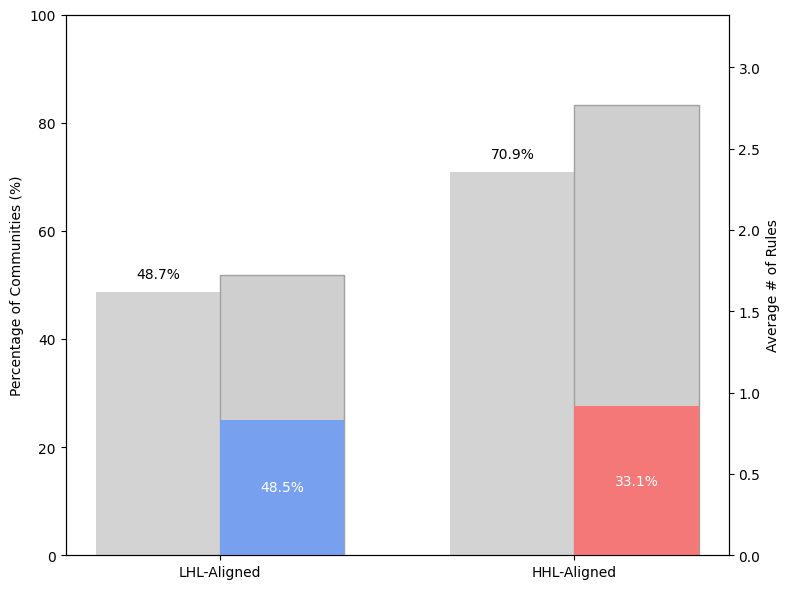

In [174]:
import matplotlib.pyplot as plt
import numpy as np

# ===============================
# Figure 1: Asymmetry in Governance Attention and Logic
# ===============================
user_types = ['LHL-Aligned', 'HHL-Aligned']

communities_pct = [48.7, 70.9]  # % of communities with rules
avg_rules = [1.72, 2.77]        # avg # of rules
segment_pct = [48.5, 33.1]      # proportion of specific rule types

# Pastel colors
colors_segment = ["#77A1EE", "#F57878"]  # pastel blue & pastel pink
color_communities = '#D3D3D3'            # pastel gray
color_avg_rules = '#CFCFCF'              # lighter gray for avg rules

fig, ax1 = plt.subplots(figsize=(8,6))
x = np.arange(len(user_types))
width = 0.35

# Bar group 1: Communities with Rules
ax1.bar(x - width/2, communities_pct, width, label='Communities with Rules', color=color_communities)
ax1.set_ylabel('Percentage of Communities (%)')
ax1.set_ylim(0, 100)

# Bar group 2: Average # of Rules
ax2 = ax1.twinx()
bars2 = ax2.bar(x + width/2, avg_rules, width, color=color_avg_rules, edgecolor="#A0A0A0")
for i in range(len(avg_rules)):
    ax2.bar(x[i] + width/2, avg_rules[i]*segment_pct[i]/100, width, color=colors_segment[i])
ax2.set_ylabel('Average # of Rules')
ax2.set_ylim(0, max(avg_rules)*1.2)

# X-axis labels
ax1.set_xticks(x)
ax1.set_xticklabels(user_types)
#plt.title('Figure 1. Asymmetry in Governance Attention and Logic for LHL vs. HHL Contributions')

# Labels on bars
for i in range(len(avg_rules)):
    ax2.text(x[i] + width/2, avg_rules[i]*segment_pct[i]/200, f"{segment_pct[i]}%", ha='center', va='center', color='white')
for i in range(len(communities_pct)):
    ax1.text(x[i] - width/2, communities_pct[i] + 2, f"{communities_pct[i]}%", ha='center', va='bottom')

plt.tight_layout()
plt.show()


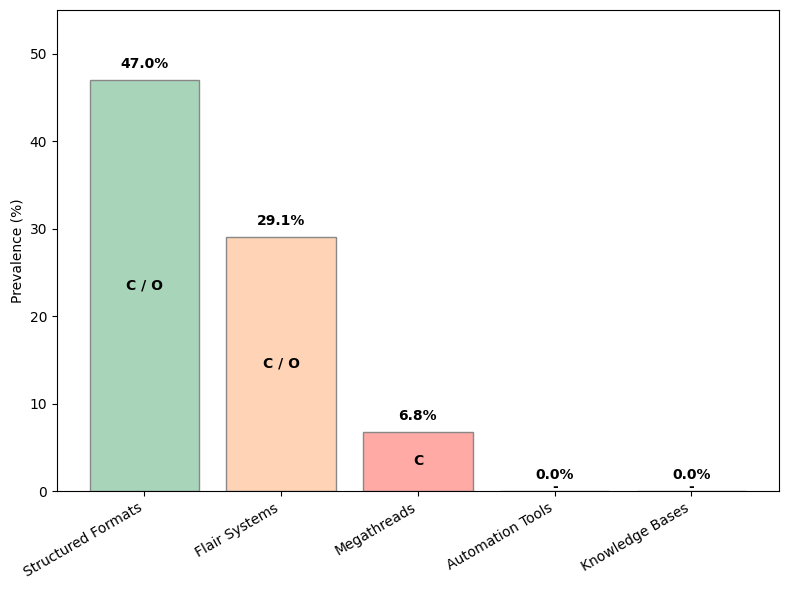

In [177]:
import pandas as pd
import matplotlib.pyplot as plt

# ===============================
# Figure 2: Prevalence and Function of Infrastructural Governance Tools
# ===============================
tools_data = pd.DataFrame({
    'Tool': ['Structured Formats', 'Flair Systems', 'Megathreads', 'Automation Tools', 'Knowledge Bases'],
    'Prevalence': [47.0, 29.1, 6.8, 0.0, 0.0],
    'Function': ['C / O', 'C / O', 'C', '-', '-']
})

# Pastel colors for bars
pastel_colors = ['#A8D5BA', '#FFD3B6', '#FFAAA5', '#CBAACB', '#A8C6FF']  # soft green, peach, pink, lilac, blue

fig, ax = plt.subplots(figsize=(8,6))
bars = ax.bar(tools_data['Tool'], tools_data['Prevalence'], color=pastel_colors, edgecolor='#888888')

# Add labels
for bar, p, f in zip(bars, tools_data['Prevalence'], tools_data['Function']):
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, height + 1, f"{p}%", ha='center', va='bottom', fontweight='bold')
    ax.text(bar.get_x() + bar.get_width()/2, height/2 if p>0 else 0.5, f"{f}", ha='center', va='center', fontweight='bold')

ax.set_ylabel('Prevalence (%)')
#plt.title('Figure 2. Prevalence and Function of Infrastructural Governance Tools')
plt.xticks(rotation=30, ha='right')
plt.ylim(0, 55)
plt.tight_layout()
plt.show()


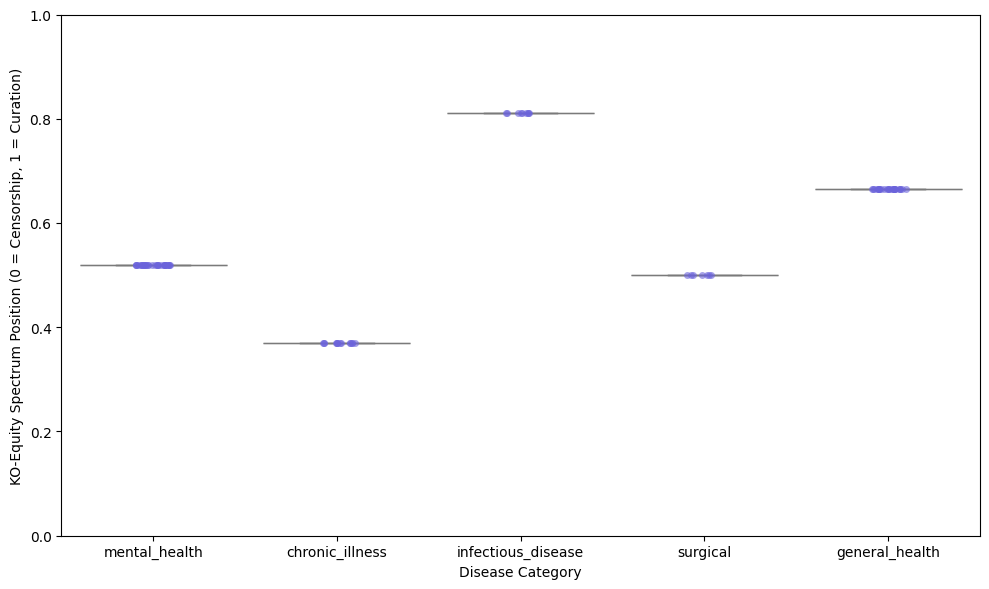

In [181]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import ast

# ===============================
# Figure 3: Stratification of Governance Models by Disease Context
# ===============================

# Safely parse communities column
def parse_communities_safe(x):
    if pd.isna(x):
        return []
    elif isinstance(x, list):
        return x
    elif isinstance(x, str):
        try:
            return ast.literal_eval(x)
        except:
            return [s.strip() for s in x.split(',')]
    else:
        return []

disease_context_analysis['communities_list'] = disease_context_analysis['communities'].apply(parse_communities_safe)

# Create long-form DataFrame: one row per community
rows = []
for _, row in disease_context_analysis.iterrows():
    for comm in row['communities_list']:
        rows.append({'Disease': row['disease_category'], 'Spectrum': row['mean_spectrum_position']})

df_disease = pd.DataFrame(rows)

plt.figure(figsize=(10,6))

# Pastel boxplot
sns.boxplot(
    x='Disease', 
    y='Spectrum', 
    data=df_disease, 
    palette='Pastel2', 
    fliersize=0,      # Hide outlier points since we use stripplot
    boxprops=dict(alpha=0.6)  # Slightly transparent boxes
)

# Soft stripplot overlay
sns.stripplot(
    x='Disease', 
    y='Spectrum', 
    data=df_disease, 
    color="#6B63DB",  # pastel cream/yellow
    size=5, 
    jitter=True, 
    alpha=0.6
)

plt.ylabel('KO-Equity Spectrum Position (0 = Censorship, 1 = Curation)')
plt.xlabel('Disease Category')
#plt.title('Figure 3. Stratification of Governance Models by Disease Context')
plt.ylim(0,1)
plt.tight_layout()
plt.show()


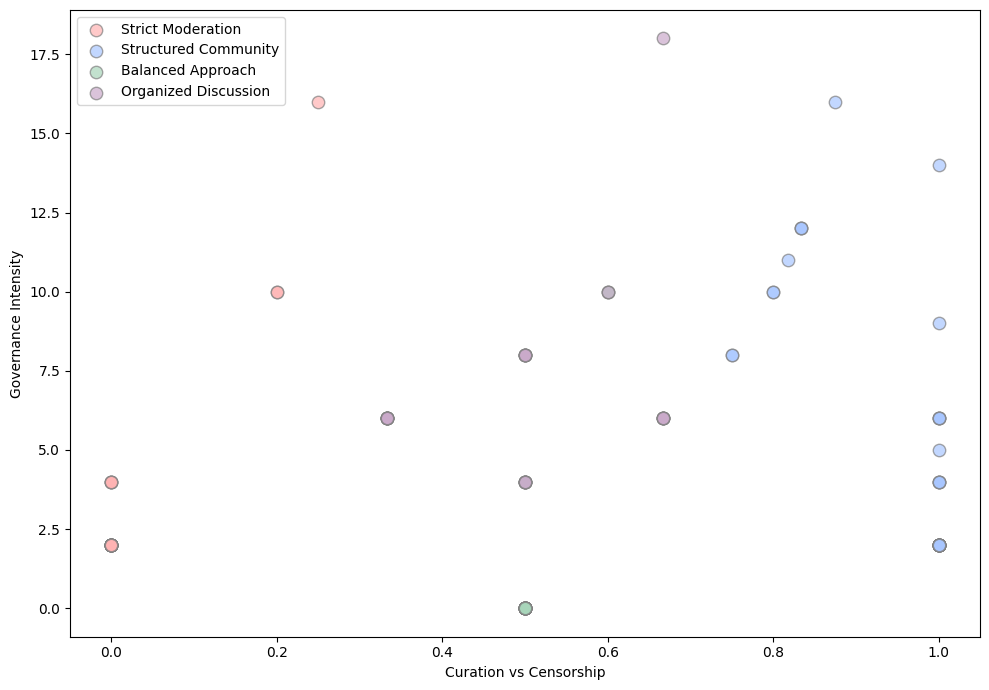

In [184]:
import matplotlib.pyplot as plt

# ===============================
# Figure 4: Governance Archetypes in the KO-Equity Space (PCA)
# ===============================
df_pca = governance_clusters.merge(spectrum_positions[['subreddit', 'total_codes']], on='subreddit', how='left')
df_pca['PC1'] = df_pca['spectrum_position']
df_pca['PC2'] = df_pca['total_codes']

# Pastel colors for clusters
cluster_colors = {
    'Strict Moderation': '#FFB3B3',    # pastel pink
    'Structured Community': '#A8C6FF', # pastel blue
    'Balanced Approach': '#A8D5BA',    # pastel green
    'Organized Discussion': '#CBAACB'  # pastel lilac
}

plt.figure(figsize=(10,7))
for cluster, color in cluster_colors.items():
    subset = df_pca[df_pca['governance_cluster'] == cluster]
    plt.scatter(
        subset['PC1'], 
        subset['PC2'], 
        label=cluster, 
        color=color, 
        s=80, 
        alpha=0.7,  # semi-transparent for pastel feel
        edgecolors='gray'  # soft edge instead of black
    )

plt.xlabel('Curation vs Censorship')
plt.ylabel('Governance Intensity')
#plt.title('Figure 4. Governance Archetypes in the KO-Equity Space (PCA)')
plt.legend()
plt.tight_layout()
plt.show()
